In [ ]:
from IPython.core.display import clear_output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as express
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
!pip install tensorflow_addons
import tensorflow_addons as tfaAdamw
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from tqdm import tqdm
from keras import callbacks
from keras.callbacks import EarlyStopping
import tensorflow_addons as tfaAdamw
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Flatten
from statistics import mean
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
clear_output()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train=pd.read_csv('/content/drive/MyDrive/UNR_IDD3/train.csv')
test=pd.read_csv('/content/drive/MyDrive/UNR_IDD3/test.csv')
val=pd.read_csv('/content/drive/MyDrive/UNR_IDD3/val.csv')

In [ ]:
train

Switch ID Port Number  Received Packets  Received Bytes  \
0     of:0000000000000004     Port#:1               240           16586   
1     of:0000000000000004     Port#:2               158           20530   
2     of:0000000000000008     Port#:3              1930        37881404   
3     of:0000000000000001     Port#:4               903        18946410   
4     of:000000000000000b     Port#:1               423           29020   
...                   ...         ...               ...             ...   
2614  of:0000000000000008     Port#:1               646        18927937   
2615  of:000000000000000b     Port#:2              3149        25488846   
2616  of:000000000000000c     Port#:3               386         6324623   
2617  of:000000000000000c     Port#:2               807        12638724   
2618  of:0000000000000001     Port#:2               545         6338371   

      Sent Bytes  Sent Packets  Port alive Duration (S)  \
0       12622603           467                      126   
1          35464           376                      171   
2       67857371        414333                     1297   
3       17900326         98088                      176   
4       19138042          1562                     1451   
...          ...           ...                      ...   
2614       26139           253                      151   
2615    31784484          3205                     2326   
2616       13285            97                      101   
2617    25268608          1238                      366   
2618    12626198           497                      161   

      Delta Received Packets  Delta Received Bytes  Delta Sent Bytes  ...  \
0                          0                     0               280  ...   
1                          4                   556              3407  ...   
2                          0                     0               556  ...   
3                          3                   320            270280  ...   
4                          0                     0               560  ...   
...                      ...                   ...               ...  ...   
2614                       2                   278               278  ...   
2615                       4                   556               556  ...   
2616                      27                526635               556  ...   
2617                      47                  3379           3939658  ...   
2618                       2                   278               278  ...   

      Connection Point  Total Load/Rate  Total Load/Latest  Unknown Load/Rate  \
0                    1                0                  0                  0   
1                    2                0                  0                  0   
2                    2                0                  0                  0   
3                    3                0                  0                  0   
4                    1                0                  0                  0   
...                ...              ...                ...                ...   
2614                 4                0                  0                  0   
2615                 3                0                  0                  0   
2616                 2                0                  0                  0   
2617                 2           630355            6303550             630355   
2618                 4                0                  0                  0   

      Unknown Load/Latest  Latest bytes counter  Active Flow Entries  \
0                       0                     0                    4   
1                       0                     0                    5   
2                       0                     0                    8   
3                       0                     0                    8   
4                       0                     0                    4   
...                   ...                   ...                  ...   
2614

In [ ]:
X_train=train.drop('Label',axis=1)
y_train=train['Label']
X_test=test.drop('Label',axis=1)
y_test=test['Label']
X_val=val.drop('Label',axis=1)
y_val=val['Label']
X_train

Switch ID Port Number  Received Packets  Received Bytes  \
0     of:0000000000000004     Port#:1               240           16586   
1     of:0000000000000004     Port#:2               158           20530   
2     of:0000000000000008     Port#:3              1930        37881404   
3     of:0000000000000001     Port#:4               903        18946410   
4     of:000000000000000b     Port#:1               423           29020   
...                   ...         ...               ...             ...   
2614  of:0000000000000008     Port#:1               646        18927937   
2615  of:000000000000000b     Port#:2              3149        25488846   
2616  of:000000000000000c     Port#:3               386         6324623   
2617  of:000000000000000c     Port#:2               807        12638724   
2618  of:0000000000000001     Port#:2               545         6338371   

      Sent Bytes  Sent Packets  Port alive Duration (S)  \
0       12622603           467                      126   
1          35464           376                      171   
2       67857371        414333                     1297   
3       17900326         98088                      176   
4       19138042          1562                     1451   
...          ...           ...                      ...   
2614       26139           253                      151   
2615    31784484          3205                     2326   
2616       13285            97                      101   
2617    25268608          1238                      366   
2618    12626198           497                      161   

      Delta Received Packets  Delta Received Bytes  Delta Sent Bytes  ...  \
0                          0                     0               280  ...   
1                          4                   556              3407  ...   
2                          0                     0               556  ...   
3                          3                   320            270280  ...   
4                          0                     0               560  ...   
...                      ...                   ...               ...  ...   
2614                       2                   278               278  ...   
2615                       4                   556               556  ...   
2616                      27                526635               556  ...   
2617                      47                  3379           3939658  ...   
2618                       2                   278               278  ...   

      Delta Port alive Duration (S)  Connection Point  Total Load/Rate  \
0                                 5                 1                0   
1                                 5                 2                0   
2                                 5                 2                0   
3                                 4                 3                0   
4                                 5                 1                0   
...                             ...               ...              ...   
2614                              5                 4                0   
2615                              5                 3                0   
2616                              4                 2                0   
2617                              5                 2           630355   
2618                              5                 4                0   

      Total Load/Latest  Unknown Load/Rate  Unknown Load/Latest  \
0                     0                  0                    0   
1                     0                  0                    0   
2                     0                  0                    0   
3                     0                  0                    0   
4                     0                  0                    0   
...                 ...                ...                  ...   
2614                  0                  0                    0   
2615                  0                  0              

In [ ]:
X_train_numeric = pd.get_dummies(X_train, drop_first=True)
X_val_numeric = pd.get_dummies(X_val, drop_first=True)
X_test_numeric = pd.get_dummies(X_test, drop_first=True)
X_train_numeric

Received Packets  Received Bytes  Sent Bytes  Sent Packets  \
0                  240           16586    12622603           467   
1                  158           20530       35464           376   
2                 1930        37881404    67857371        414333   
3                  903        18946410    17900326         98088   
4                  423           29020    19138042          1562   
...                ...             ...         ...           ...   
2614               646        18927937       26139           253   
2615              3149        25488846    31784484          3205   
2616               386         6324623       13285            97   
2617               807        12638724    25268608          1238   
2618               545         6338371    12626198           497   

      Port alive Duration (S)  Delta Received Packets  Delta Received Bytes  \
0                         126                       0                     0   
1                         171                       4                   556   
2                        1297                       0                     0   
3                         176                       3                   320   
4                        1451                       0                     0   
...                       ...                     ...                   ...   
2614                      151                       2                   278   
2615                     2326                       4                   556   
2616                      101                      27                526635   
2617                      366                      47                  3379   
2618                      161                       2                   278   

      Delta Sent Bytes  Delta Sent Packets  Delta Port alive Duration (S)  \
0                  280                   2                              5   
1                 3407                  43                              5   
2                  556                   4                              5   
3               270280                5002                              4   
4                  560                   4                              5   
...                ...                 ...                            ...   
2614               278                   2                              5   
2615               556                   4                              5   
2616               556                   4                              4   
2617           3939658                 105                              5   
2618               278                   2                              5   

      ...  Switch ID_of:0000000000000006  Switch ID_of:0000000000000007  \
0     ...                              0                              0   
1     ...                              0                              0   
2     ...                              0                              0   
3     ...                              0                              0   
4     ...                              0                              0   
...   ...                            ...                            ...   
2614  ...                              0                              0   
2615  ...                              0                              0   
2616  ...                              0                              0   
2617  ...                              0                              0   
2618  ...                              0                              0   

      Switch ID_of:0000000000000008  Switch ID_of:0000000000000009  \
0                                 0                              0   
1                                 0                              0   
2                                 1                              0   
3                                 0                              0   
4                                 0                             

In [ ]:
y_train.value_counts()

PortScan     666
TCP-SYN      651
Blackhole    561
Diversion    414
Normal       254
Overflow      73
Name: Label, dtype: int64

In [ ]:
X_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Received Packets               2619 non-null   int64
 1   Received Bytes                 2619 non-null   int64
 2   Sent Bytes                     2619 non-null   int64
 3   Sent Packets                   2619 non-null   int64
 4   Port alive Duration (S)        2619 non-null   int64
 5   Delta Received Packets         2619 non-null   int64
 6   Delta Received Bytes           2619 non-null   int64
 7   Delta Sent Bytes               2619 non-null   int64
 8   Delta Sent Packets             2619 non-null   int64
 9   Delta Port alive Duration (S)  2619 non-null   int64
 10  Connection Point               2619 non-null   int64
 11  Total Load/Rate                2619 non-null   int64
 12  Total Load/Latest              2619 non-null   int64
 13  Unknown Load/Rate 

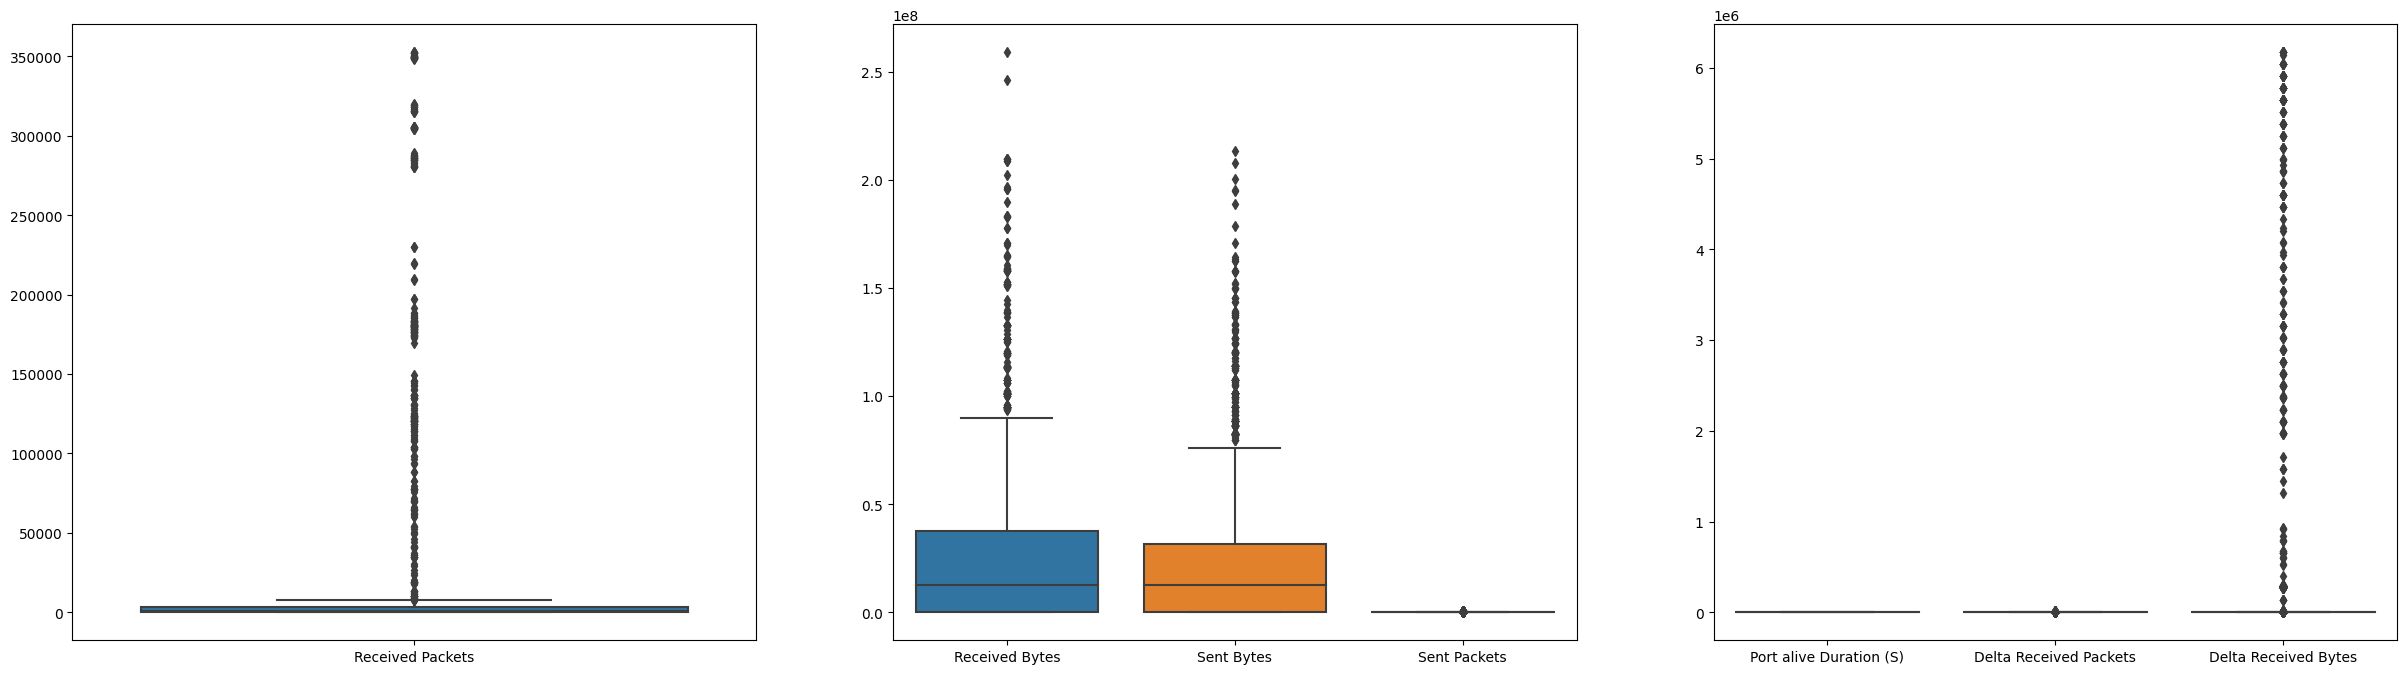

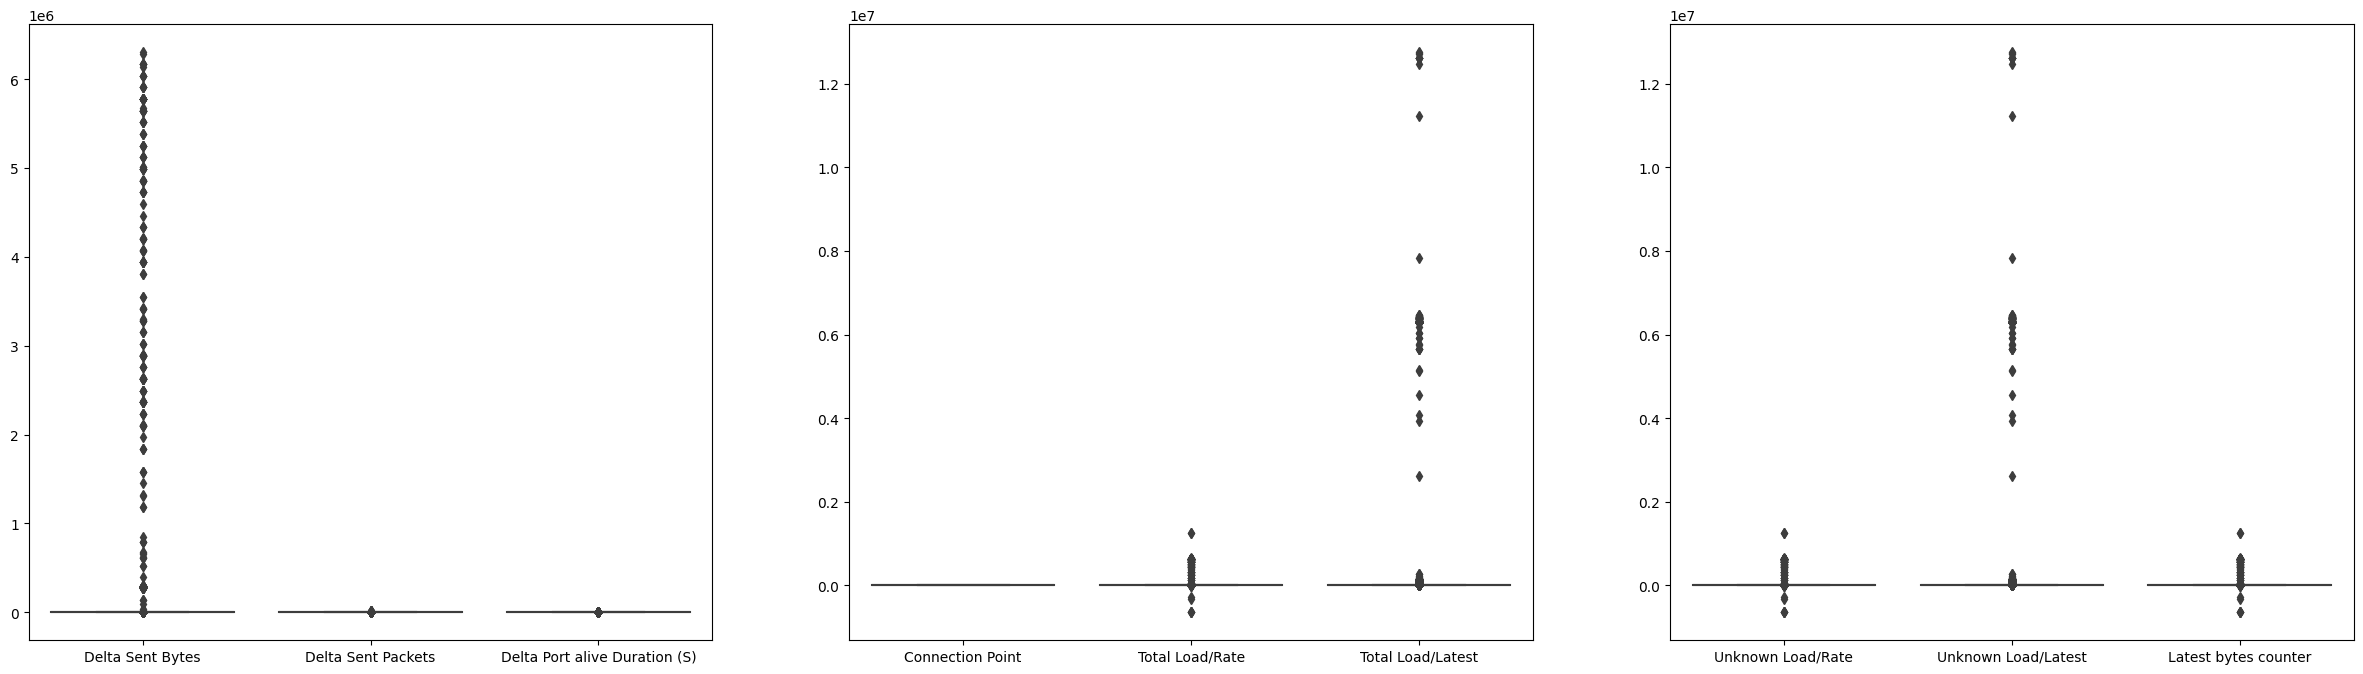

In [ ]:
for i in range(0,18,9) :
    fig,axis =plt.subplots(1,3,figsize=(30,8))
    sns.boxplot(data=X_train.iloc[:,i:i+3],ax=axis[0])
    sns.boxplot(data=X_train.iloc[:,i+3:i+6],ax=axis[1])
    sns.boxplot(data=X_train.iloc[:,i+6:i+9],ax=axis[2])
    plt.show()

In [ ]:
for i,col in enumerate(X_train_numeric.columns):
    if i > 18 :
        break
    q_low = X_train[col].quantile(0.25)
    q_hi  = X_train[col].quantile(0.75)
    IQR = (q_hi-q_low)
    df_filtered = X_train[(X_train[col] > (q_hi + 1.5 * IQR)) | (X_train[col] < (q_low - 1.5 * IQR))]
    print(f'Feature name {col} --> number of outliers is {len(df_filtered)}')

Feature name Received Packets --> number of outliers is 312
Feature name Received Bytes --> number of outliers is 186
Feature name Sent Bytes --> number of outliers is 222
Feature name Sent Packets --> number of outliers is 379
Feature name Port alive Duration (S) --> number of outliers is 0
Feature name Delta Received Packets --> number of outliers is 649
Feature name Delta Received Bytes --> number of outliers is 648
Feature name Delta Sent Bytes --> number of outliers is 604
Feature name Delta Sent Packets --> number of outliers is 604
Feature name Delta Port alive Duration (S) --> number of outliers is 441
Feature name Connection Point --> number of outliers is 0
Feature name Total Load/Rate --> number of outliers is 396
Feature name Total Load/Latest --> number of outliers is 501
Feature name Unknown Load/Rate --> number of outliers is 396
Feature name Unknown Load/Latest --> number of outliers is 501
Feature name Latest bytes counter --> number of outliers is 396
Feature name Act

In [ ]:
X_train_numeric.describe()

Received Packets  Received Bytes    Sent Bytes   Sent Packets  \
count       2619.000000    2.619000e+03  2.619000e+03    2619.000000   
mean       19929.095074    2.606639e+07  2.372645e+07   33676.567774   
std        61817.860816    3.670801e+07  3.309908e+07   90565.150583   
min           10.000000    8.560000e+02  6.025000e+03      44.000000   
25%          321.500000    8.464900e+04  5.360900e+04     333.500000   
50%         1108.000000    1.262083e+07  1.262176e+07    1243.000000   
75%         3268.500000    3.736785e+07  3.170219e+07    3727.000000   
max       352584.000000    2.589422e+08  2.130728e+08  420806.000000   

       Port alive Duration (S)  Delta Received Packets  Delta Received Bytes  \
count              2619.000000             2619.000000          2.619000e+03   
mean                890.539137              174.948835          3.254661e+05   
std                 970.916789             1028.907797          1.166624e+06   
min                  26.000000                0.000000          0.000000e+00   
25%                 136.000000                2.000000          2.780000e+02   
50%                 254.000000                4.000000          5.560000e+02   
75%                1721.000000                6.000000          8.310000e+02   
max                3317.000000            15588.000000          6.171714e+06   

       Delta Sent Bytes  Delta Sent Packets  Delta Port alive Duration (S)  \
count      2.619000e+03         2619.000000                    2619.000000   
mean       2.957171e+05          160.607866                       4.831615   
std        1.107859e+06          972.484039                       0.374279   
min        2.780000e+02            2.000000                       4.000000   
25%        2.800000e+02            2.000000                       5.000000   
50%        5.560000e+02            4.000000                       5.000000   
75%        7.590000e+02            5.000000                       5.000000   
max        6.302910e+06        15593.000000                       5.000000   

       ...  Switch ID_of:0000000000000006  Switch ID_of:0000000000000007  \
count  ...                    2619.000000                    2619.000000   
mean   ...                       0.046201                       0.072165   
std    ...                       0.209960                       0.258810   
min    ...                       0.000000                       0.000000   
25%    ...                       0.000000                       0.000000   
50%    ...                       0.000000                       0.000000   
75%    ...                       0.000000                       0.000000   
max    ...                       1.000000                       1.000000   

       Switch ID_of:0000000000000008  Switch ID_of:0000000000000009  \
count                    2619.000000                    2619.000000   
mean                        0.057274                       0.050019   
std                         0.232409                       0.218026   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         0.000000                       0.000000   
max                         1.000000                       1.000000   

       Switch ID_of:000000000000000a  Switch ID_of:000000000000000b  \
count                    2619.000000                    2619.000000   
mean                        0.128293                       0.058037   
std                         0.334480                       0.233859   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         0.000000                       0.000000   
max                         1.000000     

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow as tf
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_numeric), columns = X_train_numeric.columns)
X_val_scaled= pd.DataFrame(scaler.transform(X_val_numeric), columns = X_val_numeric.columns)
X_test_scaled= pd.DataFrame(scaler.transform(X_test_numeric), columns = X_test_numeric.columns)
X_train_scaled

Received Packets  Received Bytes  Sent Bytes  Sent Packets  \
0            -0.318563       -0.709785   -0.335537     -0.366763   
1            -0.319889       -0.709677   -0.715896     -0.367768   
2            -0.291219        0.321926    1.333552      4.203925   
3            -0.307835       -0.194000   -0.176054      0.711352   
4            -0.315602       -0.709446   -0.138653     -0.354670   
...                ...             ...         ...           ...   
2614         -0.311994       -0.194503   -0.716178     -0.369126   
2615         -0.271496       -0.015737    0.243498     -0.336524   
2616         -0.316200       -0.537908   -0.716567     -0.370849   
2617         -0.309389       -0.365867    0.046601     -0.358248   
2618         -0.313628       -0.537534   -0.335429     -0.366431   

      Port alive Duration (S)  Delta Received Packets  Delta Received Bytes  \
0                   -0.787591               -0.170066             -0.279034   
1                   -0.741234               -0.166178             -0.278558   
2                    0.418716               -0.170066             -0.279034   
3                   -0.736083               -0.167150             -0.278760   
4                    0.577359               -0.170066             -0.279034   
...                       ...                     ...                   ...   
2614                -0.761837               -0.168122             -0.278796   
2615                 1.478742               -0.166178             -0.278558   
2616                -0.813345               -0.143820              0.172470   
2617                -0.540355               -0.124378             -0.276137   
2618                -0.751536               -0.168122             -0.278796   

      Delta Sent Bytes  Delta Sent Packets  Delta Port alive Duration (S)  \
0            -0.266725           -0.163127                       0.449977   
1            -0.263902           -0.120959                       0.449977   
2            -0.266476           -0.161070                       0.449977   
3            -0.022965            4.979328                      -2.222336   
4            -0.266472           -0.161070                       0.449977   
...                ...                 ...                            ...   
2614         -0.266727           -0.163127                       0.449977   
2615         -0.266476           -0.161070                       0.449977   
2616         -0.266476           -0.161070                      -2.222336   
2617          3.289801           -0.057192                       0.449977   
2618         -0.266727           -0.163127                       0.449977   

      ...  Switch ID_of:0000000000000006  Switch ID_of:0000000000000007  \
0     ...                      -0.220088                      -0.278887   
1     ...                      -0.220088                      -0.278887   
2     ...                      -0.220088                      -0.278887   
3     ...                      -0.220088                      -0.278887   
4     ...                      -0.220088                      -0.278887   
...   ...                            ...                            ...   
2614  ...                      -0.220088                      -0.278887   
2615  ...                      -0.220088                      -0.278887   
2616  ...                      -0.220088                      -0.278887   
2617  ...                      -0.220088                      -0.278887   
2618  ...                      -0.220088                      -0.278887   

      Switch ID_of:0000000000000008  Switch ID_of:0000000000000009  \
0                         -0.246482                      -0.229462   
1                         -0.246482                      -0.229462   
2                          4.057093                      -0.229462   
3                         -0.246482                      -0.229462   
4                         -0.246482                      -0.2294

In [ ]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Received Packets               2619 non-null   float64
 1   Received Bytes                 2619 non-null   float64
 2   Sent Bytes                     2619 non-null   float64
 3   Sent Packets                   2619 non-null   float64
 4   Port alive Duration (S)        2619 non-null   float64
 5   Delta Received Packets         2619 non-null   float64
 6   Delta Received Bytes           2619 non-null   float64
 7   Delta Sent Bytes               2619 non-null   float64
 8   Delta Sent Packets             2619 non-null   float64
 9   Delta Port alive Duration (S)  2619 non-null   float64
 10  Connection Point               2619 non-null   float64
 11  Total Load/Rate                2619 non-null   float64
 12  Total Load/Latest              2619 non-null   f

In [ ]:
X_train_scaled_tensor=tf.convert_to_tensor(X_train_scaled, dtype=np.float64)
X_val_scaled_tensor=tf.convert_to_tensor(X_val_scaled,dtype=np.float64)
X_test_scaled_tensor=tf.convert_to_tensor(X_test_scaled,dtype=np.float64)
X_train_scaled_tensor

<tf.Tensor: shape=(2619, 33), dtype=float64, numpy=
array([[-0.31856254, -0.70978461, -0.33553717, ..., -0.69559521,
        -0.57161851, -0.37108805],
       [-0.31988928, -0.70967715, -0.71589647, ...,  1.43761773,
        -0.57161851, -0.37108805],
       [-0.29121895,  0.32192611,  1.333552  , ..., -0.69559521,
         1.74941851, -0.37108805],
       ...,
       [-0.31620032, -0.53790819, -0.71656668, ..., -0.69559521,
         1.74941851, -0.37108805],
       [-0.30938869, -0.36586654,  0.04660094, ...,  1.43761773,
        -0.57161851, -0.37108805],
       [-0.31362775, -0.53753359, -0.33542854, ...,  1.43761773,
        -0.57161851, -0.37108805]])>

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)
y_train_encoded

array([5, 5, 2, ..., 5, 0, 5])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.ensemble import RandomForestClassifier

# Step 1: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)

# Step 2: Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Step 3: Perform ANOVA-based feature selection using SelectPercentile
# Replace RandomForestClassifier with the desired classifier
estimator = RandomForestClassifier()  # You can use any machine learning model here
percentile = 70  # Adjust the percentage of features you want to keep
select_percentile = SelectPercentile(score_func=f_classif, percentile=percentile)
fit = select_percentile.fit(X_train_scaled, y_train_encoded)

# Get the selected feature indices and their names
selected_feature_indices = fit.get_support()
selected_feature_names = X_train_numeric.columns[selected_feature_indices]

# Print the selected feature names
print("Selected Features:")
print(selected_feature_names)


Selected Features:
Index(['Received Packets', 'Received Bytes', 'Sent Bytes', 'Sent Packets',
       'Port alive Duration (S)', 'Delta Received Packets',
       'Delta Sent Packets', 'Delta Port alive Duration (S)',
       'Connection Point', 'Total Load/Rate', 'Total Load/Latest',
       'Unknown Load/Rate', 'Unknown Load/Latest', 'Latest bytes counter',
       'Active Flow Entries', 'Packets Looked Up', 'Packets Matched',
       'Switch ID_of:0000000000000003', 'Switch ID_of:0000000000000004',
       'Switch ID_of:0000000000000007', 'Switch ID_of:0000000000000008',
       'Switch ID_of:0000000000000009', 'Port Number_Port#:3'],
      dtype='object')


Accuracy: 0.6987522281639929
Precision: 0.7321047539423384
Recall: 0.6987522281639929
F1-Score: 0.6952132722267292


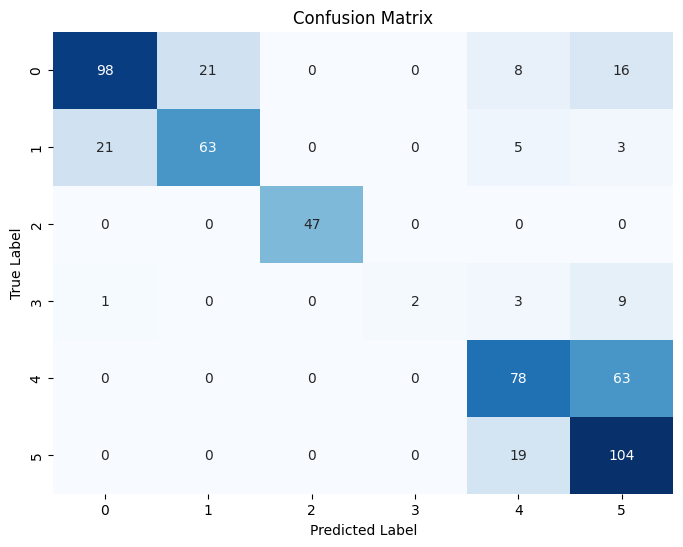

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Step 1: Build the SVM model
svm_model = SVC(random_state=42)

# Step 2: Train the model on the selected features
svm_model.fit(X_train_scaled, y_train_encoded)

# Step 3: Make predictions on the validation data
X_val_scaled = scaler.transform(X_val_numeric)  # Assuming you have scaled X_val_numeric as well
y_val_pred = svm_model.predict(X_val_scaled)

# Step 4: Evaluate the model's performance
accuracy = accuracy_score(y_val_encoded, y_val_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_val_encoded, y_val_pred, average='weighted')
conf_matrix = confusion_matrix(y_val_encoded, y_val_pred)

# Step 5: Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Step 6: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Best Hyperparameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Accuracy: 0.6755793226381461
Precision: 0.6990445512533058
Recall: 0.6755793226381461
F1-Score: 0.6723099720329626


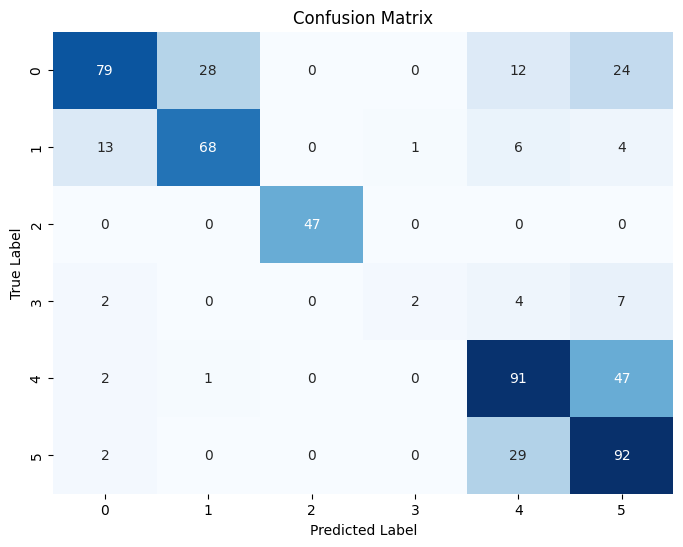

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_val_scaled = scaler.transform(X_val_numeric)

# Step 2: Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],    # Try different values of k
    'weights': ['uniform', 'distance'],
    'p': [1, 2]                     # For Minkowski distance (1=Manhattan, 2=Euclidean)
}

knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_encoded)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Step 3: Train the model with the best hyperparameters
best_knn_model = KNeighborsClassifier(**best_params)
best_knn_model.fit(X_train_scaled, y_train_encoded)

# Step 4: Make predictions on the validation data
y_val_pred = best_knn_model.predict(X_val_scaled)

# Step 5: Evaluate the model's performance
accuracy = accuracy_score(y_val_encoded, y_val_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_val_encoded, y_val_pred, average='weighted')
conf_matrix = confusion_matrix(y_val_encoded, y_val_pred)

# Step 6: Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Step 7: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.8057040998217468
Precision: 0.8040468190686334
Recall: 0.8057040998217468
F1-Score: 0.8035069946379186


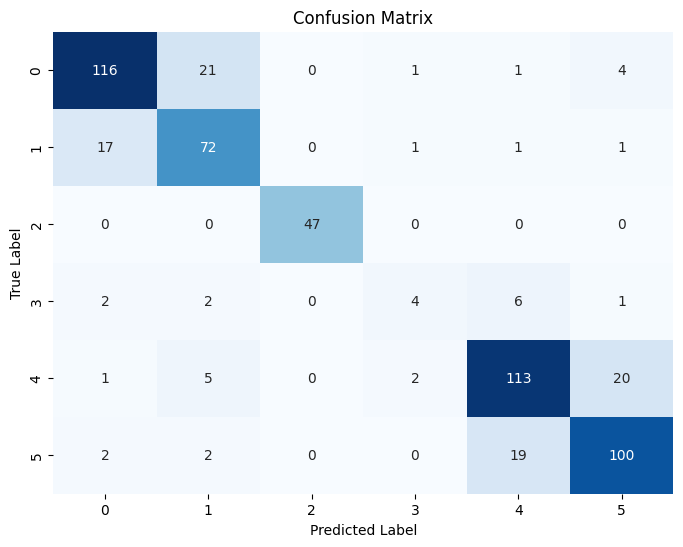

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Step 1: Build the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Step 2: Train the model on the selected features
dt_model.fit(X_train_scaled, y_train_encoded)

# Step 3: Make predictions on the validation data
X_val_scaled = scaler.transform(X_val_numeric)  # Assuming you have scaled X_val_numeric as well
y_val_pred = dt_model.predict(X_val_scaled)

# Step 4: Evaluate the model's performance
accuracy = accuracy_score(y_val_encoded, y_val_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_val_encoded, y_val_pred, average='weighted')
conf_matrix = confusion_matrix(y_val_encoded, y_val_pred)

# Step 5: Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Step 6: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



Accuracy: 0.6167557932263814
Precision: 0.6800895370386743
Recall: 0.6167557932263814
F1-Score: 0.6147506081414217


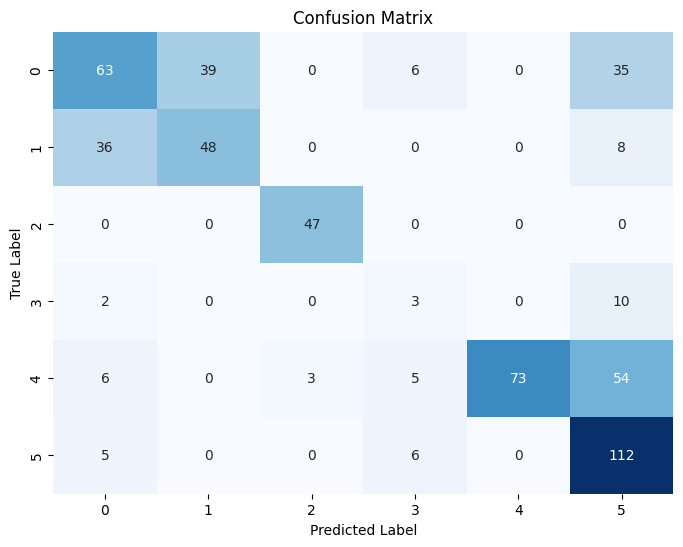

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Step 1: Build the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Step 2: Train the model on the selected features
nb_model.fit(X_train_numeric, y_train_encoded)

# Step 3: Make predictions on the validation data
y_val_pred = nb_model.predict(X_val_numeric)

# Step 4: Evaluate the model's performance
accuracy = accuracy_score(y_val_encoded, y_val_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_val_encoded, y_val_pred, average='weighted')
conf_matrix = confusion_matrix(y_val_encoded, y_val_pred)

# Step 5: Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Step 6: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
!pip install tensorflow-addons

In [ ]:
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense
from tensorflow_addons.optimizers import AdamW
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

In [ ]:
def plot_history(dict_of_lists,type='loss'):
  axis_idx=[(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]
  fig, axes = plt.subplots(2, 3,figsize=(20,10))

  for i in range(len(dict_of_lists)):
    ax=axes[axis_idx[i][0]][axis_idx[i][1]]
    # summarize history for accuracy
    ax.plot(dict_of_lists[i].history[type])
    ax.plot(dict_of_lists[i].history[f'val_{type}'])
    ax.set_title(f'Model {i+1} {type.title()}',size=15)
    ax.set_ylabel(f'{type.title()}',size=10)
    ax.set_xlabel('Epoch',size=10)
    ax.legend(['train', 'test'], loc='upper left')
  plt.suptitle(f'Models {type.title()} per Epoc',size=15,y=.93)
  plt.show()

In [ ]:
def Build_model(X_train,y_train,X_val,y_val,X_test,y_test,optimizer,
                n_of_hidden_layers,n_neurons,activation='relu',epochs=100,batch_size=1024,early_stopping=True):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(X_train.shape[1],)))
    for _ in range(n_of_hidden_layers):
      model.add(keras.layers.Dense(n_neurons, activation=activation))
    model.add(keras.layers.Dense(6, activation='softmax'))

    model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    es=tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        mode="auto",
        baseline=None,
        restore_best_weights=True,)
    # Fit model
    if early_stopping :
        history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=epochs,batch_size=batch_size,callbacks=[es],verbose=0)
    else:
        history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size,verbose=0)
    # Evaluate the model
    train_evaluation = model.evaluate(X_train, y_train)
    test_evaluation = model.evaluate(X_test, y_test)
    validation_evaluation = model.evaluate(X_val, y_val)
    return model, history, train_evaluation, validation_evaluation ,test_evaluation

In [ ]:
def Build_experment(X_train,y_train,X_val,y_val,X_test,y_test,optimizer,
                    n_of_hidden_layers,n_neurons,activation='relu',epochs=100,batch_size=1024,n_of_models=5,early_stopping=True):
    models_dict = {'models':[], 'history': []}

    models_train_acc = []
    models_test_acc = []
    models_valid_acc = []
    for j in range(n_of_models):
        # Build model
        model, history, train_evaluation,valid_evaluation, test_evaluation = Build_model(X_train,y_train,X_val,y_val,X_test,y_test,optimizer,
                n_of_hidden_layers,n_neurons,activation=activation,epochs=epochs,batch_size=batch_size,early_stopping=early_stopping)
        # Save data
        models_train_acc.append(train_evaluation[1])
        models_test_acc.append(test_evaluation[1])
        models_valid_acc.append(valid_evaluation[1])

        models_dict['models'].append(model)
        models_dict['history'].append(history)


    accuracies_dict={}
    accuracies_dict["Min_train_acc"]=min(models_train_acc)
    accuracies_dict["Max_train_acc"]=max(models_train_acc)
    accuracies_dict["AVG_train_acc"]=mean(models_train_acc)

    accuracies_dict["Min_test_acc"]=min(models_test_acc)
    accuracies_dict["Max_test_acc"]=max(models_test_acc)
    accuracies_dict["AVG_test_acc"]=mean(models_test_acc)

    accuracies_dict["Min_valid_acc"]=min(models_valid_acc)
    accuracies_dict["Max_valid_acc"]=max(models_valid_acc)
    accuracies_dict["AVG_valid_acc"]=mean(models_valid_acc)

    return accuracies_dict, models_dict,models_train_acc,models_test_acc,models_valid_acc

In [ ]:
optimizer=AdamW(learning_rate=0.001, weight_decay=.00001)
base_line_accuracies_dict, base_line_models_dict,base_line_models_train_acc,base_line_models_test_acc,base_line_models_valid_acc = Build_experment(X_train_scaled_tensor, y_train_encoded, X_val_scaled_tensor, y_val_encoded, X_test_scaled_tensor, y_test_encoded, optimizer, n_of_hidden_layers=1, n_neurons=10, activation='relu', epochs=100, batch_size=1024, n_of_models=5,early_stopping=False)

18/18 [==============================] - 0s 2ms/step - loss: 0.7195 - accuracy: 0.6881


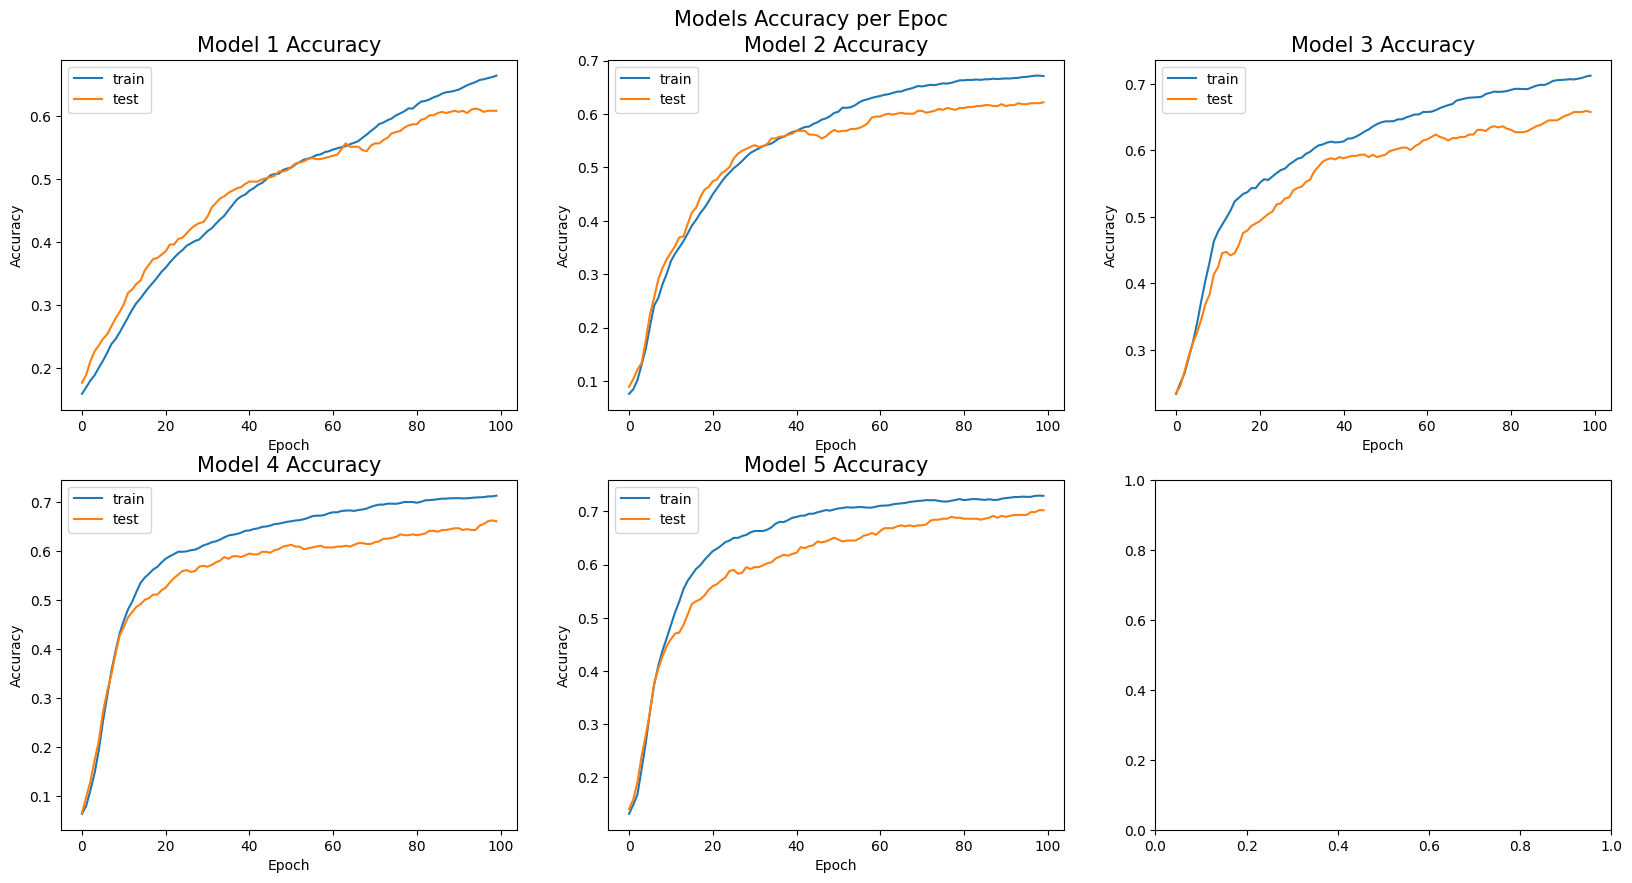

In [ ]:
plot_history(base_line_models_dict['history'],type='accuracy')

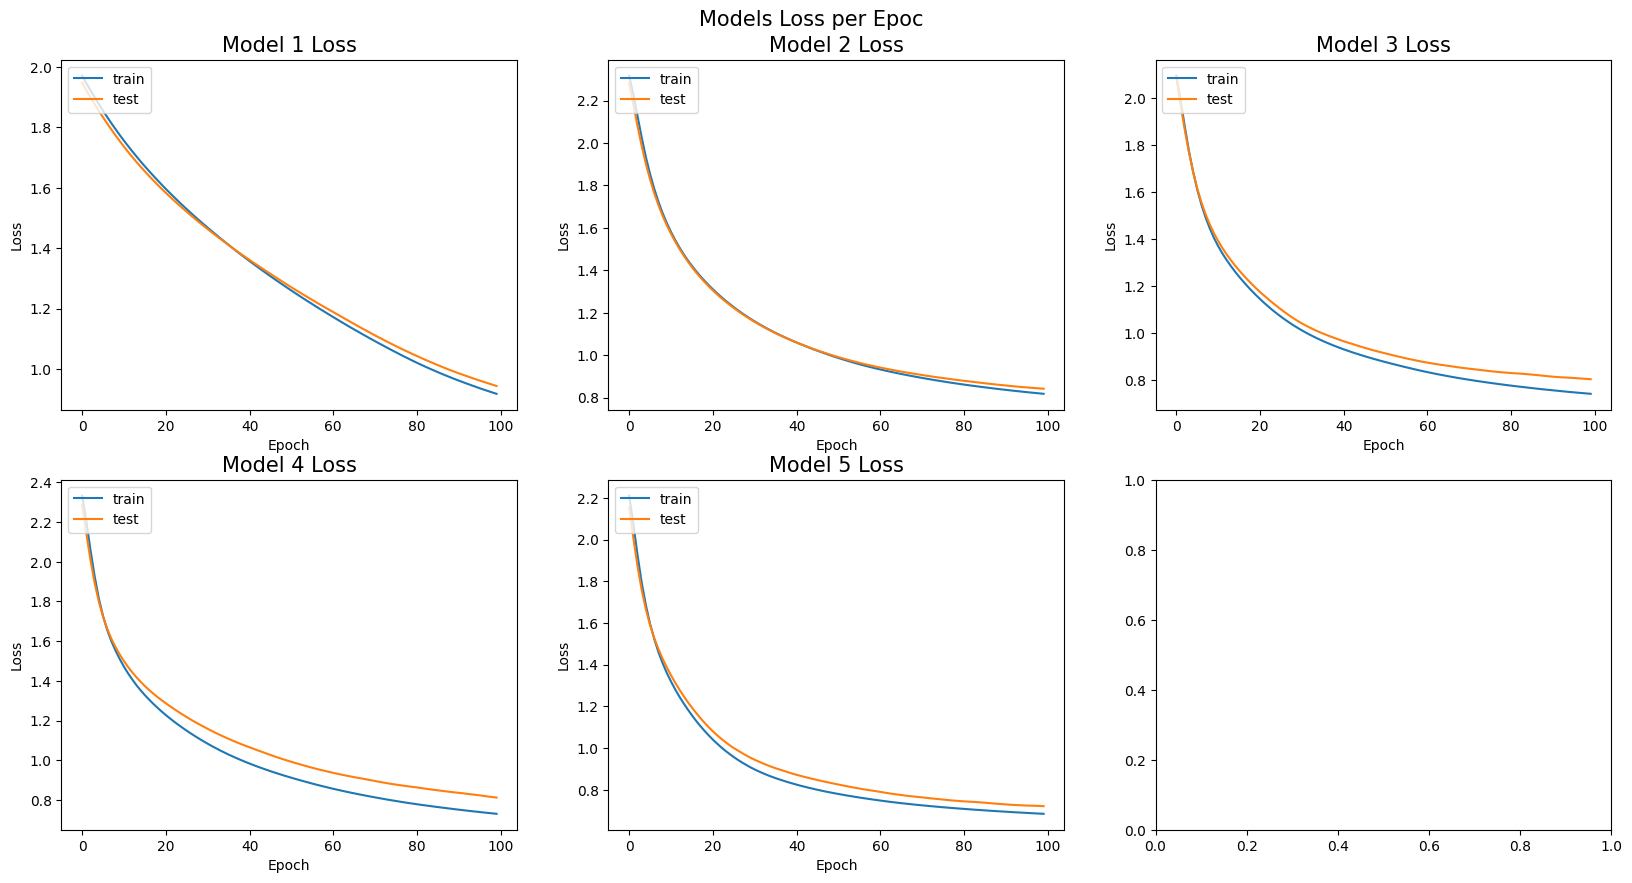

In [ ]:
plot_history(base_line_models_dict['history'],type='loss')

In [ ]:
# base_line_highest_acc = base_line_models_dict['models'][np.array(base_line_models_test_acc).argmax()]
pd.DataFrame(pd.Series(base_line_accuracies_dict)).transpose()

Min_train_acc  Max_train_acc  AVG_train_acc  Min_test_acc  Max_test_acc  \
0       0.664758       0.729286       0.699045      0.607843      0.702317   

   AVG_test_acc  Min_valid_acc  Max_valid_acc  AVG_valid_acc  
0      0.650267       0.645276       0.688057       0.672014

In [ ]:
# Calculate the Average confusion test matrix
cm = np.zeros(shape=(6,6))
for model in base_line_models_dict['models']:
    pred = model.predict(X_test_scaled).argmax(axis=1)
    cm += confusion_matrix(y_test_encoded, pred)
cm_avg = cm/ len(base_line_models_dict['models'])

18/18 [==============================] - 0s 2ms/step


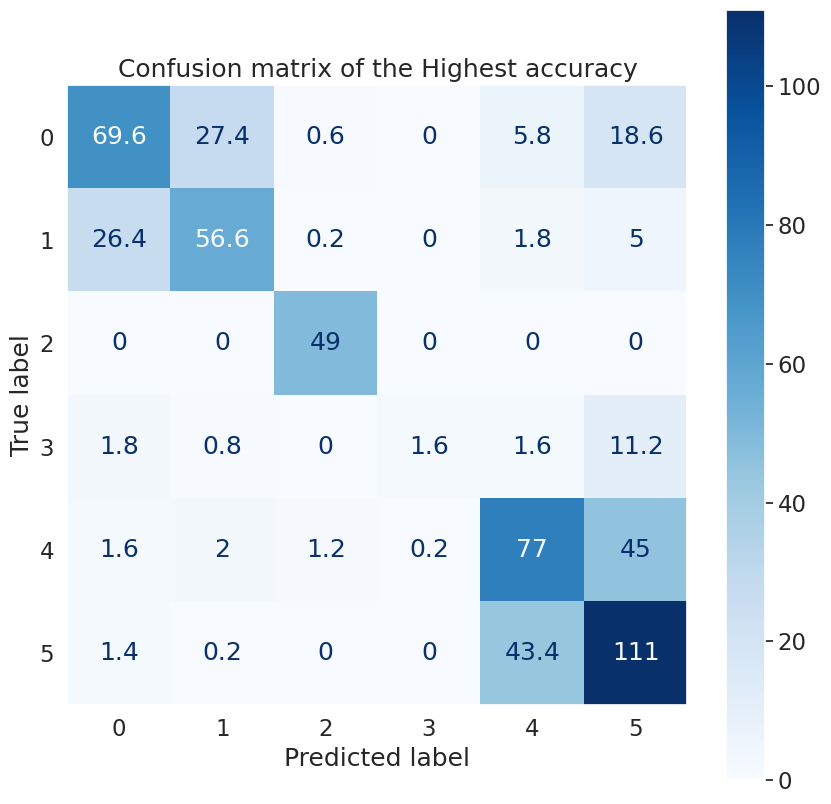

In [ ]:
# Set your custom color palette
colors = ["#FF4500", "#FF8C00"]
sns.set_palette(sns.color_palette(colors))
sns.set(font_scale = 1.5)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_avg,)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g',)

fig = disp.ax_.get_figure()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.title('Confusion matrix of the Highest accuracy')
plt.grid(False)
plt.show()

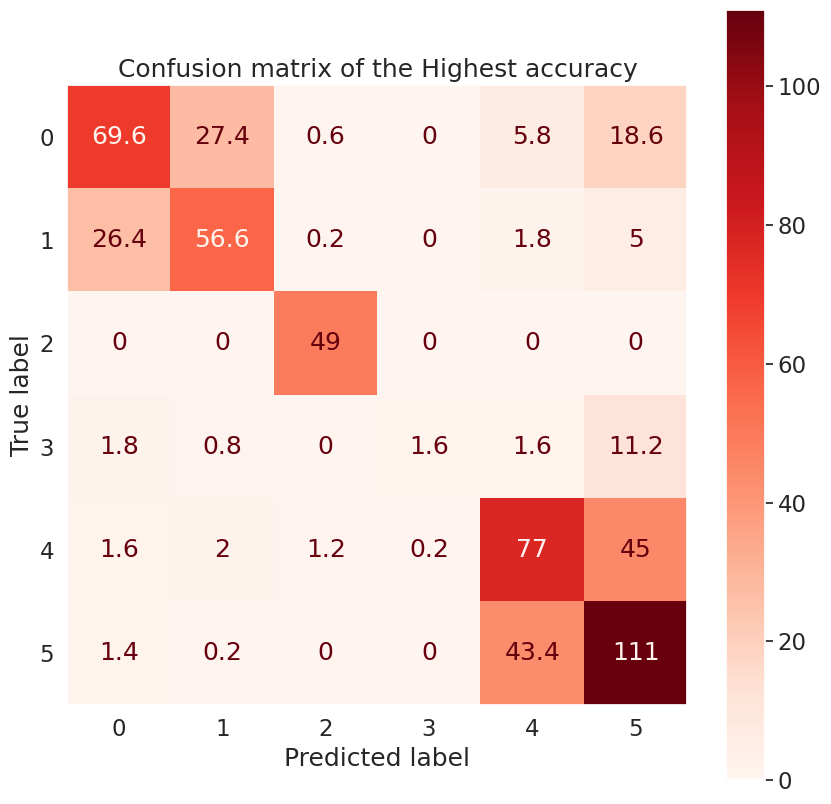

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay



# Set your custom color palette
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
sns.set(font_scale=1.5)

# Create the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm_avg)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(cmap=plt.cm.Reds, ax=ax, values_format='g')

# Set the title and grid
plt.title('Confusion matrix of the Highest accuracy')
plt.grid(False)

# Show the confusion matrix
plt.show()



In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(rc={'figure.figsize':(15,15)})
sns.set_context("notebook", font_scale=2)
def TSNE_visualizer(data_set):
  tsne = TSNE(n_components=2, random_state=0,init='pca',learning_rate='auto')
  z = tsne.fit_transform(data_set)
  return z

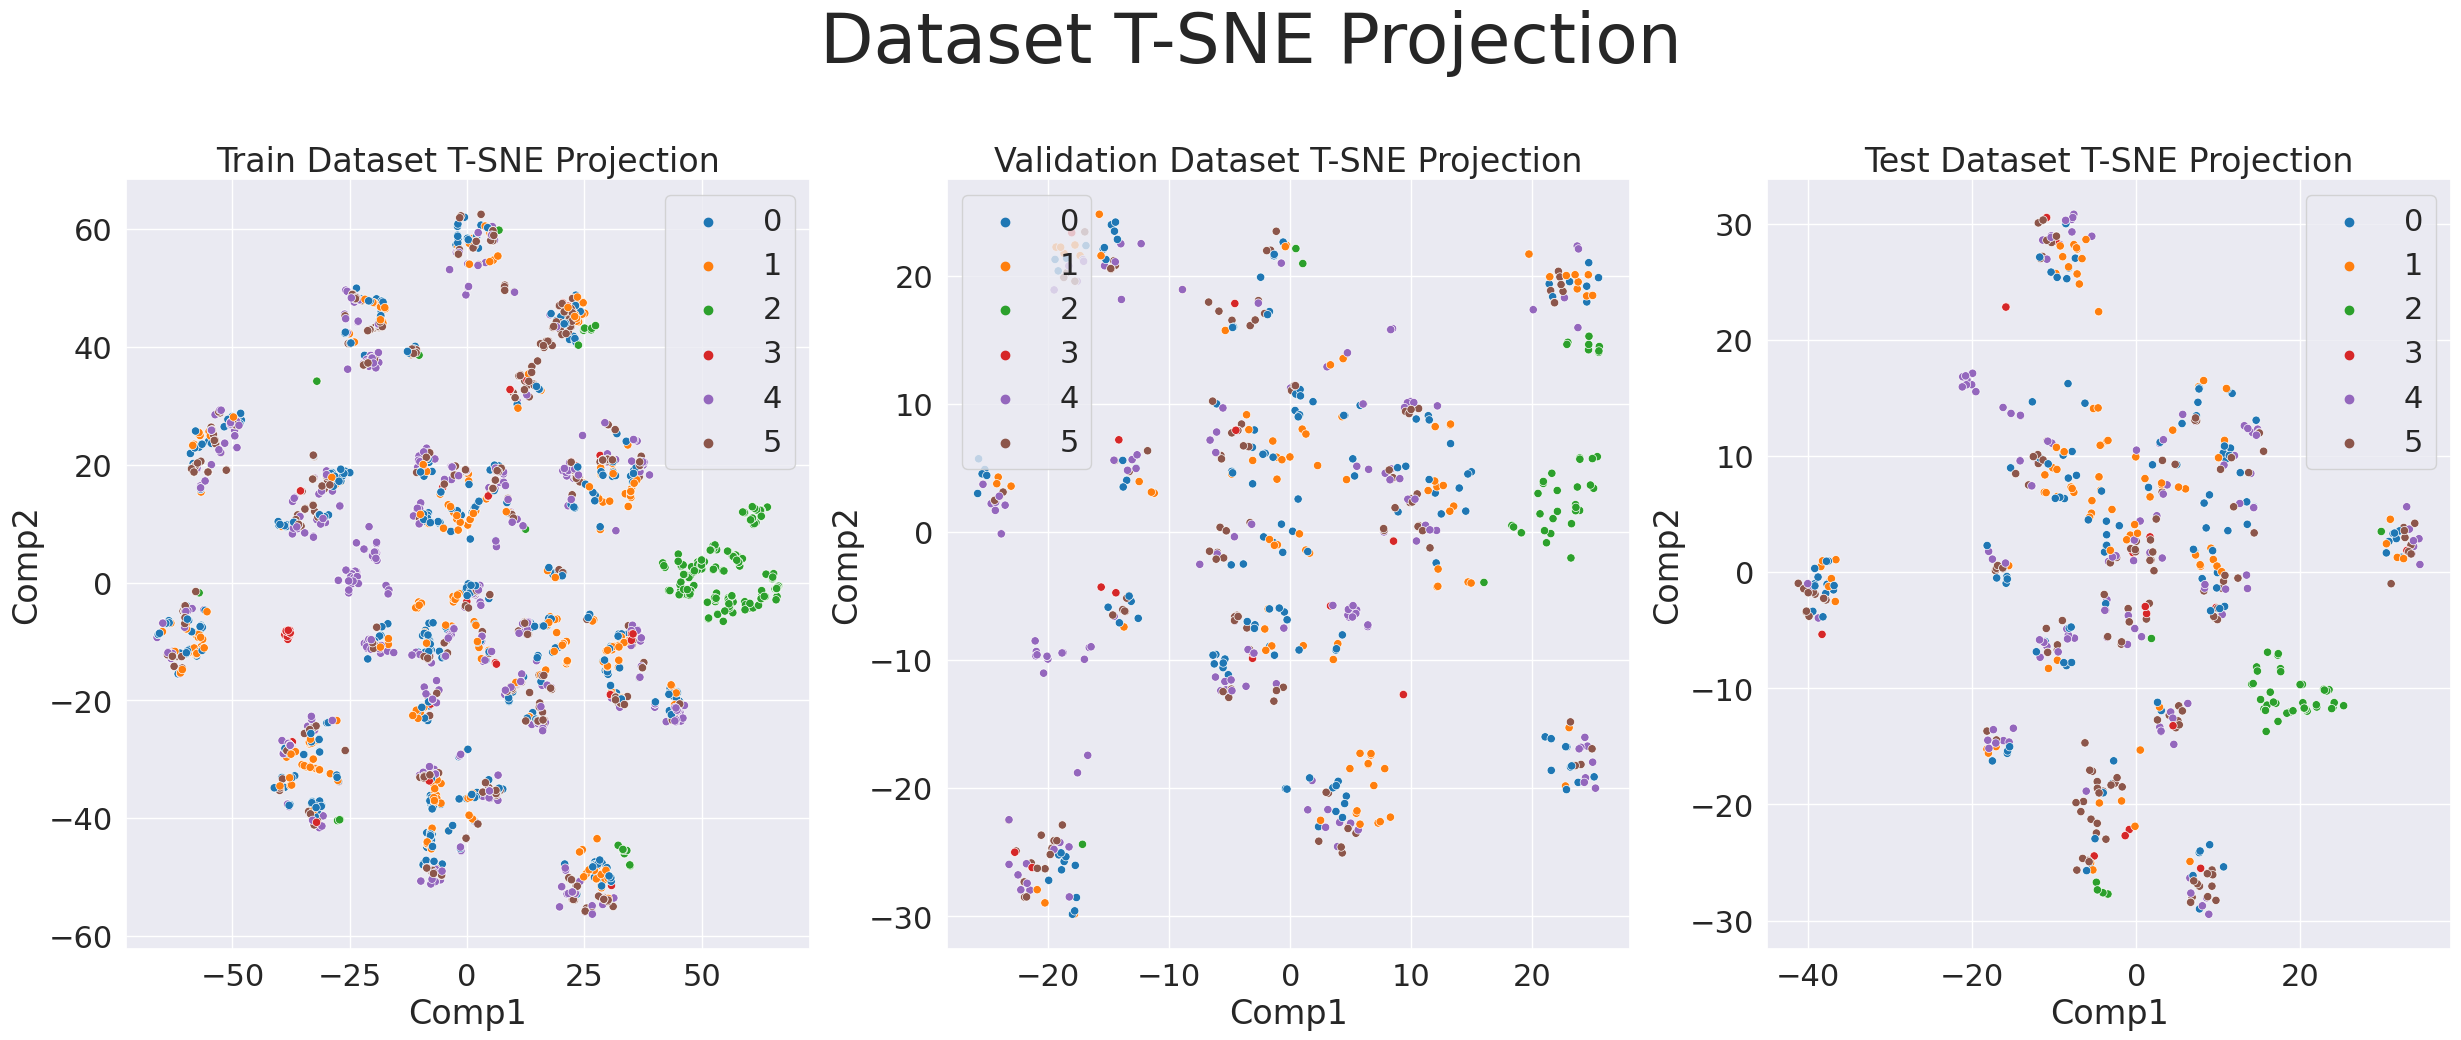

In [ ]:
# TSNE_visualizer(np.array(encoded_train, dtype='float'), y_train_ord, 'Training')
t_sne_plots = [TSNE_visualizer(np.array(X_train_scaled, dtype='float')),
               TSNE_visualizer(np.array(X_val_scaled, dtype='float')),
               TSNE_visualizer(np.array(X_test_scaled, dtype='float'))]

x_size , y_size =1,3
fig, axes = plt.subplots(1, 3,figsize=(30,10))

titles =["Train","Validation", "Test"]
c = [y_train_encoded, y_val_encoded, y_test_encoded]

for i in range(3):
    ax = axes[i]
    sns.scatterplot(x=t_sne_plots[i][:,0], y=t_sne_plots[i][:,1], hue=c[i], ax=ax, palette="tab10")
    ax.set_title(f"{titles[i]} Dataset T-SNE Projection")
    ax.set_xlabel('Comp1')
    ax.set_ylabel('Comp2')

plt.suptitle('Dataset T-SNE Projection',size=50,y=1.05)
plt.savefig("Dataset T-SNE Projection.png")
plt.show()


Compring the dimensionality reduction to the feature selection
Apply PCA as a dimensionality reduction
a) Find the best value of n components, based on test accuracies


In [ ]:
from sklearn.decomposition import PCA

n_comp = range(2,34)
PCA_test_accuracies =[]
PCA_val_accuracies=[]
for i in n_comp:
    pca = PCA(n_components=i,random_state=0)
    pca_train = tf.convert_to_tensor(pca.fit_transform(X_train_scaled))
    pca_val = tf.convert_to_tensor(pca.transform(X_val_scaled))
    pca_test = tf.convert_to_tensor(pca.transform(X_test_scaled))
    pca_accuracies_dict, pca_models_dict,pca_models_train_acc,pca_models_test_acc,pca_models_valid_acc = Build_experment(pca_train, y_train_encoded, pca_val, y_val_encoded, pca_test, y_test_encoded, optimizer, n_of_hidden_layers=1, n_neurons=10, activation='relu', epochs=100, batch_size=512, n_of_models=5)

    PCA_test_accuracies.append(pca_accuracies_dict['AVG_test_acc'])
    PCA_val_accuracies.append(pca_accuracies_dict['AVG_valid_acc'])

18/18 [==============================] - 0s 2ms/step - loss: 0.6221 - accuracy: 0.7380


NN Accuracy VS PCA component


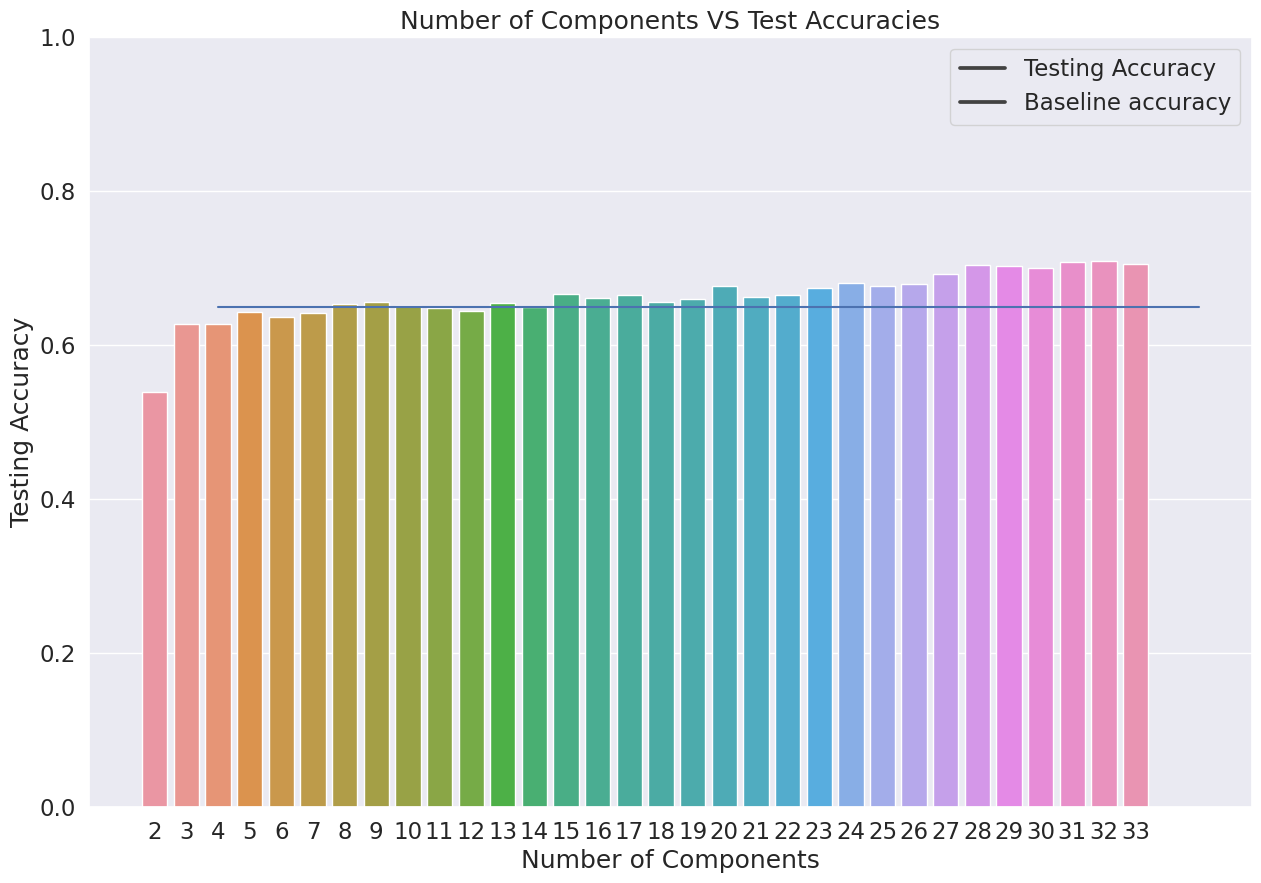

In [ ]:
import seaborn as sns
sns.set_context("talk")
sns.set(rc = {'figure.figsize':(15,10)})
sns.set(font_scale = 1.5)

sns.barplot(x=list(n_comp) , y = PCA_test_accuracies)
sns.lineplot(x= list(n_comp), y = [base_line_accuracies_dict["AVG_test_acc"]]*len(PCA_test_accuracies),sizes=[10]).set(title='Number of Components VS Test Accuracies')
plt.xlabel('Number of Components')
plt.ylabel('Testing Accuracy')
plt.legend(['Testing Accuracy','Baseline accuracy'])
plt.ylim(0,1)
plt.show()

2D TSNE plots, one for the training set and one for the test set

In [ ]:
n_comp=list(n_comp)
best_n_com=n_comp[np.array(PCA_test_accuracies).argmax()]
best_n_com,max(PCA_test_accuracies)

(32, 0.7090909004211425)

Train with the best number of componant

In [ ]:
pca = PCA(n_components=best_n_com)
pca_train = pca.fit_transform(X_train_scaled)
pca_val = pca.transform(X_val_scaled)
pca_test = pca.transform(X_test_scaled)

PLot the T-SNE for the Data after the Dimensionality reduction

In [ ]:
t_sne_plots = [TSNE_visualizer(np.array(pca_train, dtype='float')),
               TSNE_visualizer(np.array(pca_val, dtype='float')),
               TSNE_visualizer(np.array(pca_test, dtype='float'))]

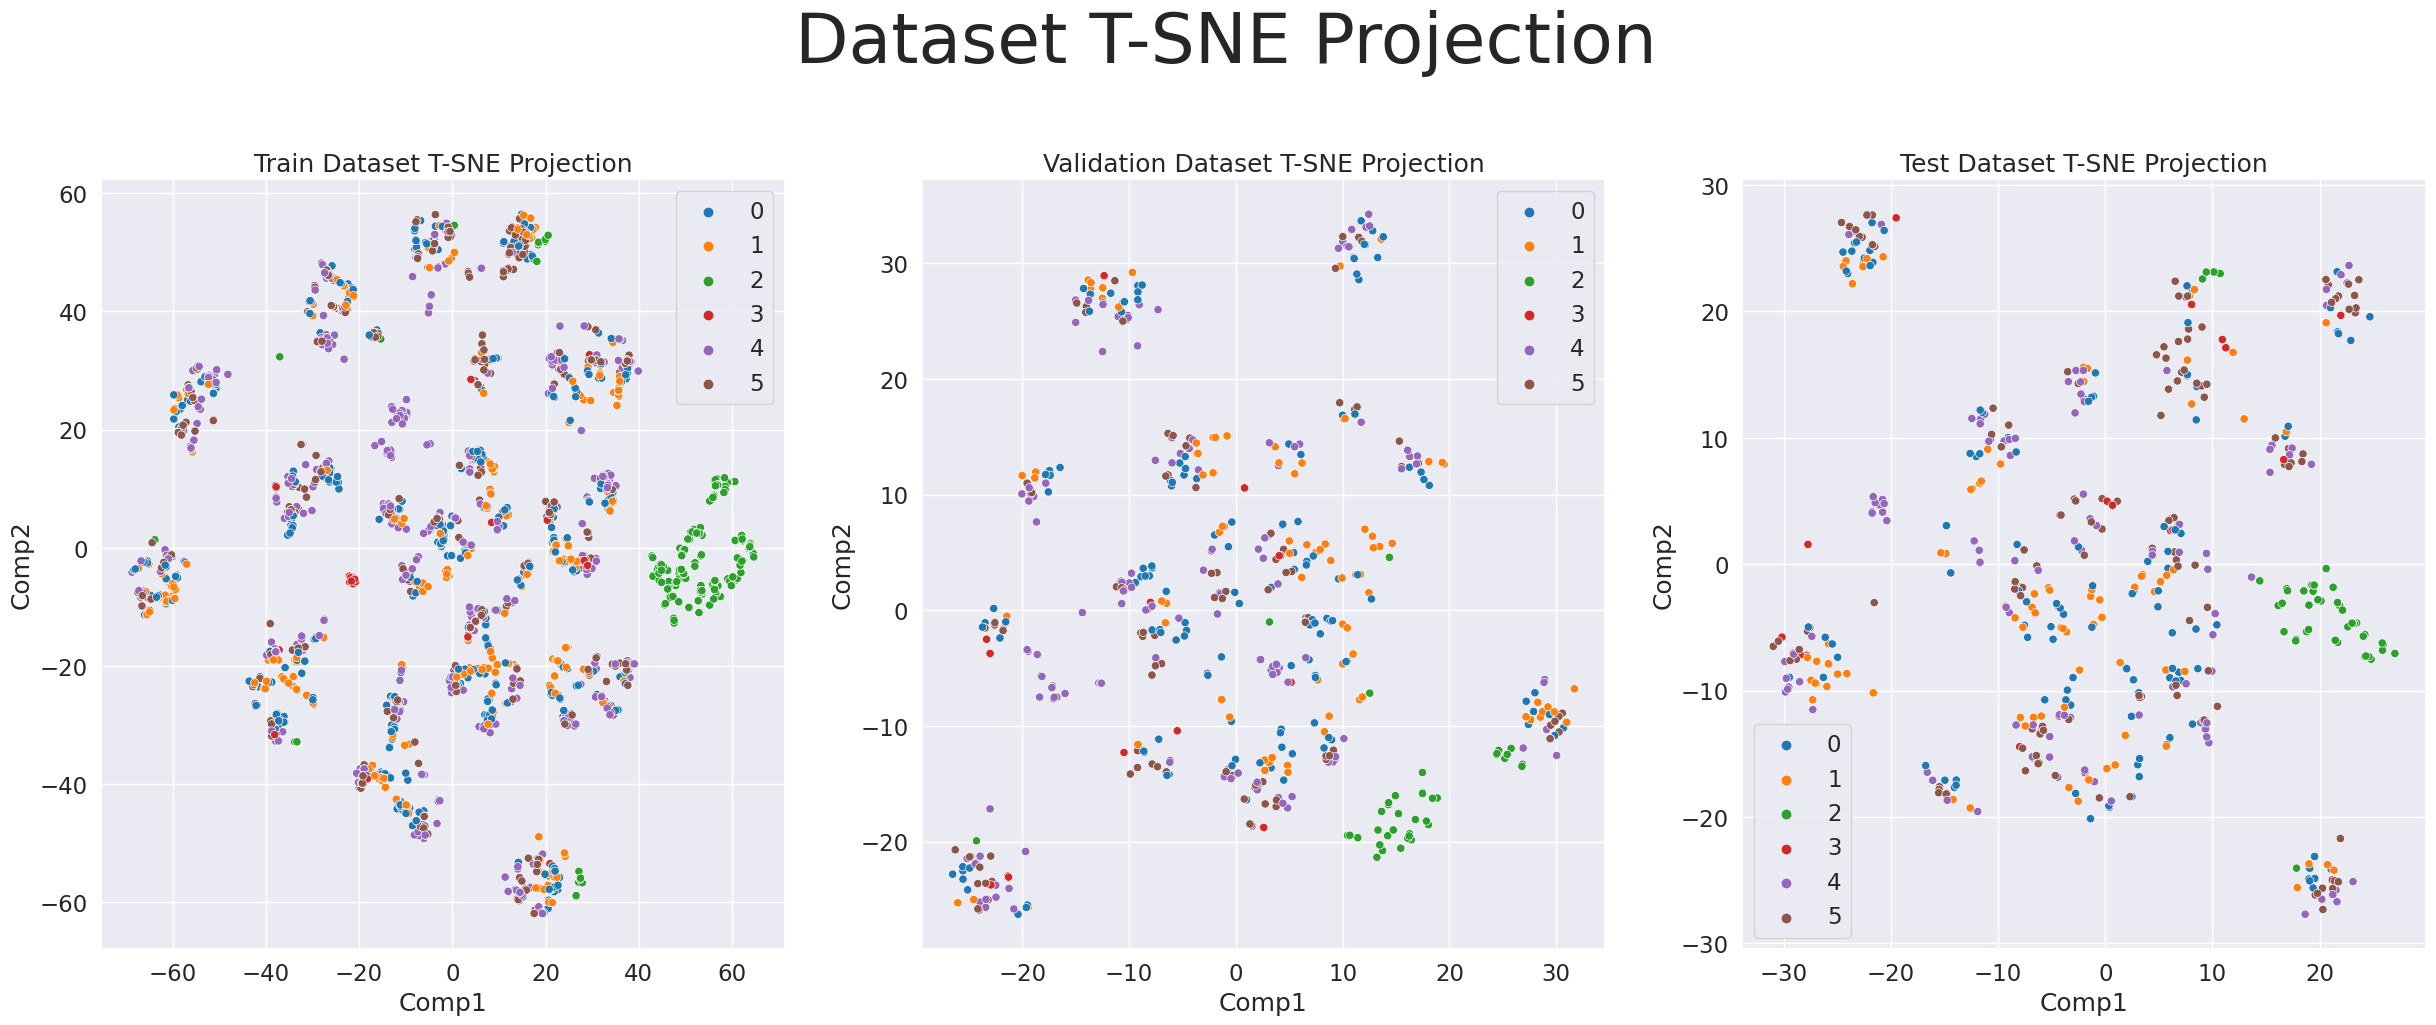

In [ ]:
x_size , y_size =1,3
fig, axes = plt.subplots(1, 3,figsize=(30,10))

titles =["Train","Validation", "Test"]
c = [y_train_encoded, y_val_encoded, y_test_encoded]
for i in range(3):
  ax = axes[i]
  sns.scatterplot(x=t_sne_plots[i][:,0], y=t_sne_plots[i][:,1],hue=c[i],ax=ax,palette="tab10")
  # ax.scatter(x=t_sne_plots[i][:,0], y=t_sne_plots[i][:,1], c= c[i])
  ax.set_title(f"{titles[i]} Dataset T-SNE Projection")
  ax.set_xlabel('Comp1')
  ax.set_ylabel('Comp2')

plt.suptitle('Dataset T-SNE Projection',size=50,y=1.05)
plt.savefig("Dataset T-SNE Projection.png")
plt.show()

Use ANOVA and Mutual Information to select the best feature with testing accuracy
helper function to select the best features for anova and mutual information

In [ ]:

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

n_features = X_train_scaled.shape[1]
def feature_selection(function,X_train,y_train,X_val,y_val,X_test,y_test):
    test_accuracies =[]
    val_accuracies=[]
    models=[]
    for i in range(1,n_features+1):
        k_best = SelectKBest(function, k=i)
        X_train_best=tf.convert_to_tensor(k_best.fit_transform(X_train,y_train))
        X_val_best=tf.convert_to_tensor(k_best.transform(X_val))
        X_test_best=tf.convert_to_tensor(k_best.transform(X_test))
        feature_selection_accuracies_dict, feature_selection_models_dict,feature_selection_models_train_acc,feature_selection_models_test_acc,feature_selection_models_valid_acc = Build_experment(X_train_best, y_train_encoded, X_val_best, y_val_encoded, X_test_best, y_test_encoded, optimizer, n_of_hidden_layers=1, n_neurons=10, activation='relu', epochs=100, batch_size=512, n_of_models=5)
        models.append(feature_selection_models_dict)
        test_accuracies.append(feature_selection_accuracies_dict['AVG_test_acc'])
        val_accuracies.append(feature_selection_accuracies_dict['AVG_valid_acc'])
    return test_accuracies,val_accuracies,models

In [ ]:
anova_test_accuracies,anova_val_accuracies,anova_models=feature_selection(f_classif, X_train_scaled, y_train_encoded, X_val_scaled, y_val_encoded, X_test_scaled, y_test_encoded)

18/18 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.7041


<Axes: title={'center': 'Anova test accuracies vs number of features'}, xlabel='Number of features', ylabel='Accuracies'>

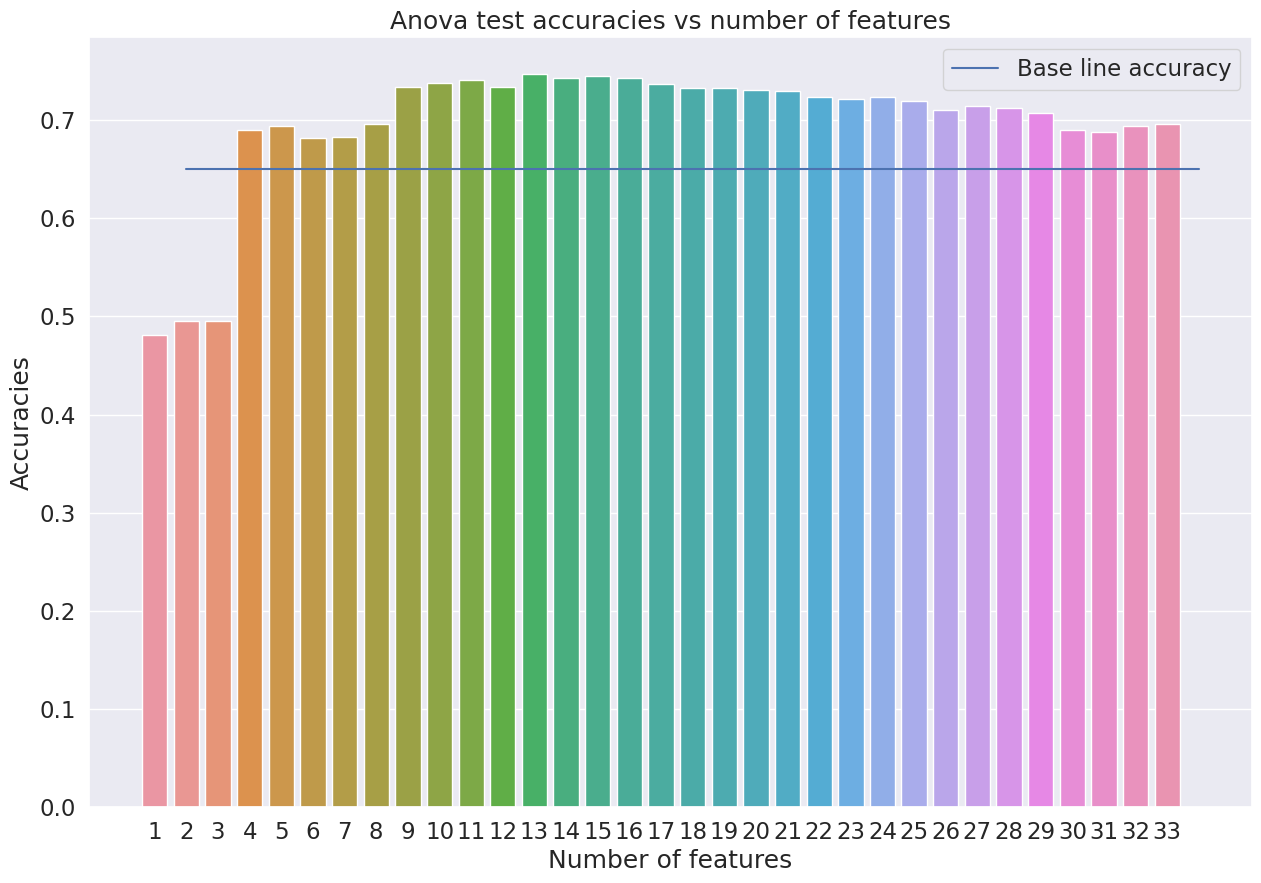

In [ ]:
sns.barplot(x=list(range(1,n_features+1)),y=anova_test_accuracies).set(title='Anova test accuracies vs number of features',xlabel='Number of features',ylabel='Accuracies')
sns.lineplot(x=list(range(1,n_features+1)),y= [base_line_accuracies_dict["AVG_test_acc"]]*n_features,label='Base line accuracy')

In [ ]:
mutual_information_test_accuracies,mutual_information_val_accuracies,mutual_information_models=feature_selection(mutual_info_classif, X_train_scaled, y_train_encoded, X_val_scaled, y_val_encoded, X_test_scaled, y_test_encoded)

18/18 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.7237


<Axes: title={'center': 'Mutual information test accuracies vs number of features'}, xlabel='Number of features', ylabel='Accuracies'>

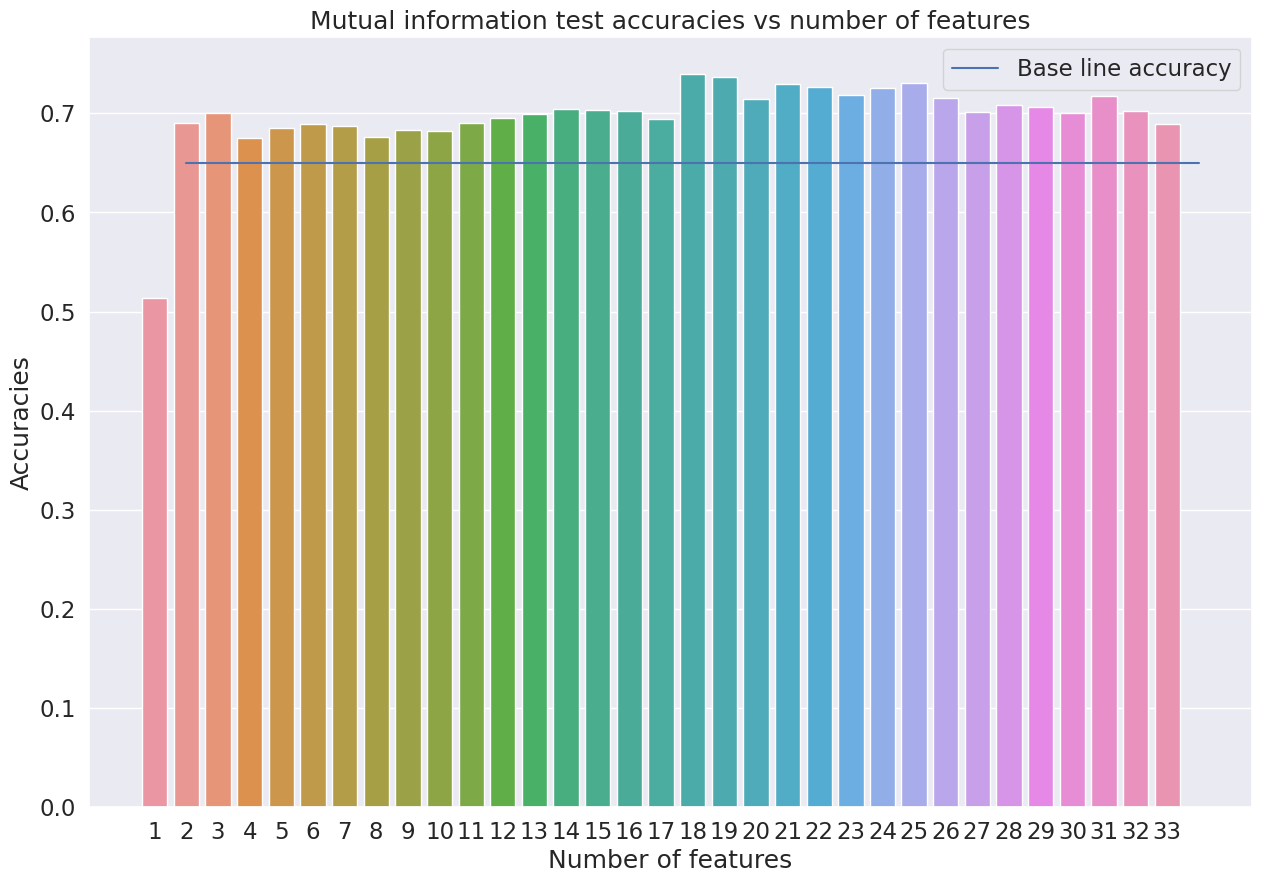

In [ ]:
sns.barplot(x=list(range(1,n_features+1)),y=mutual_information_test_accuracies).set(title='Mutual information test accuracies vs number of features',xlabel='Number of features',ylabel='Accuracies')
sns.lineplot(x=list(range(1,n_features+1)),y= [base_line_accuracies_dict["AVG_test_acc"]]*n_features,label='Base line accuracy')

In [ ]:
max(anova_test_accuracies),max(mutual_information_test_accuracies)

(0.746880578994751, 0.7397504448890686)

<Axes: >

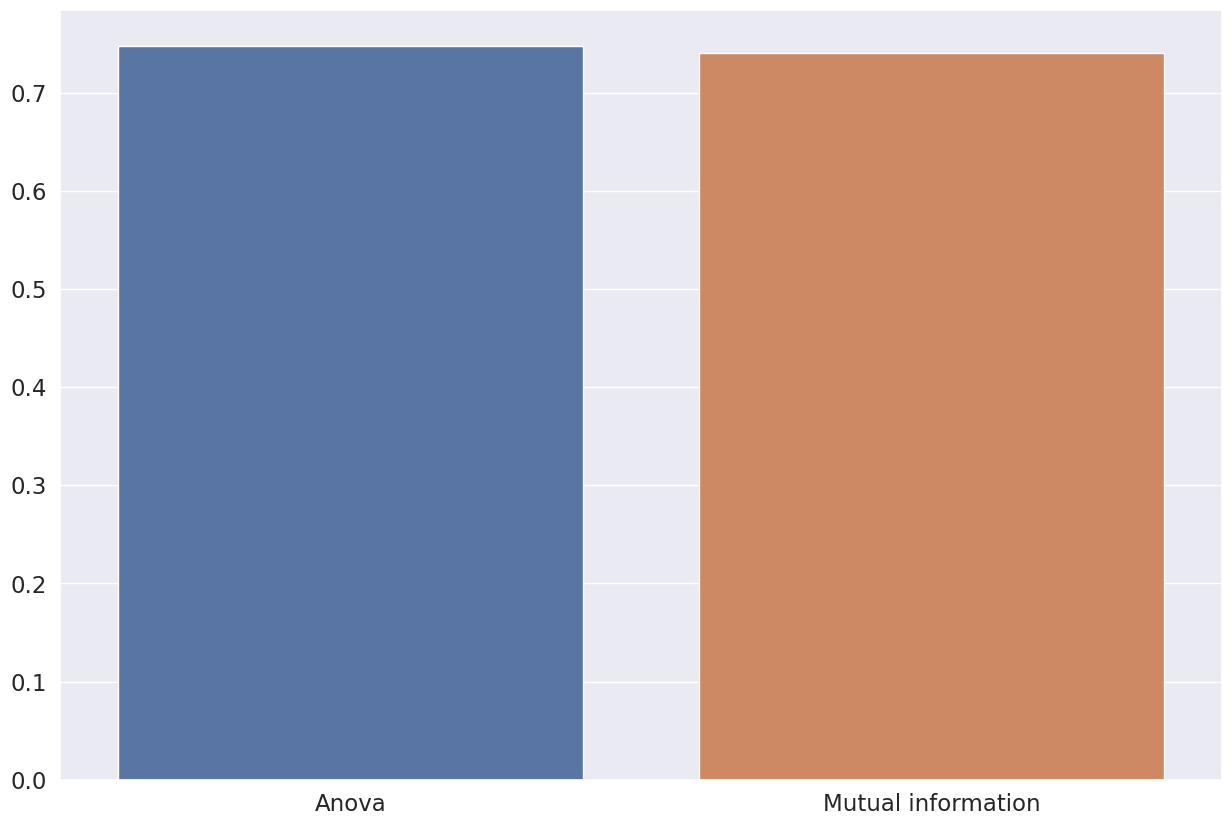

In [ ]:
sns.barplot(x=["Anova","Mutual information"],y=[max(anova_test_accuracies),max(mutual_information_test_accuracies)])

<Axes: >

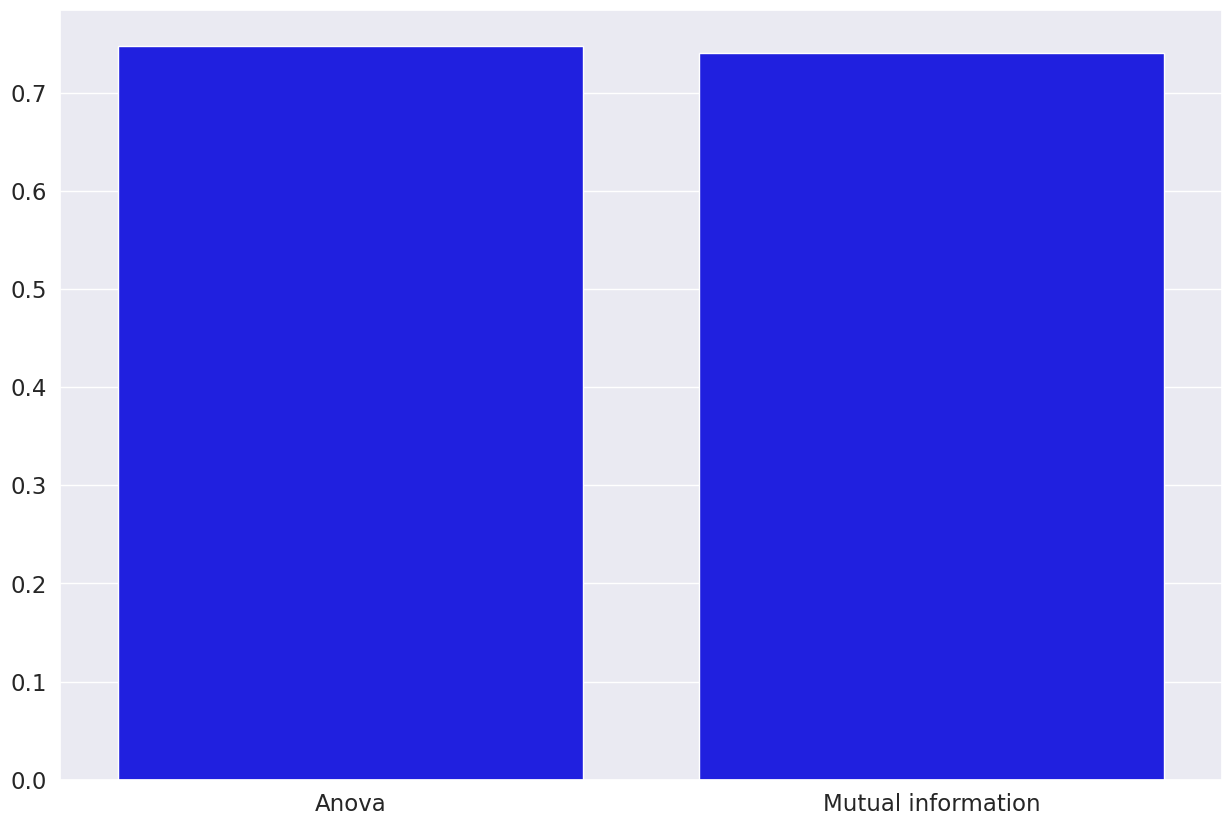

In [ ]:
sns.barplot(x=["Anova", "Mutual information"], y=[max(anova_test_accuracies), max(mutual_information_test_accuracies)], color='blue')


In [ ]:
n_features_arr=list(range(1,n_features+1))
best_n_feature_anova=n_features_arr[np.array(anova_test_accuracies).argmax()]
best_n_feature_anova

13

In [ ]:
k_best = SelectKBest(f_classif, k=best_n_feature_anova)
X_train_best_anova=k_best.fit_transform(X_train_scaled, y_train_encoded)
X_val_best_anova=k_best.transform(X_val_scaled)
X_test_best_anova=k_best.transform(X_test_scaled)

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(rc={'figure.figsize':(15,15)})
sns.set_context("notebook", font_scale=2)
tsne = TSNE(n_components=2, random_state=0,init='pca',learning_rate='auto')
X_train_best_anova_tsne= tsne.fit_transform(X_train_best_anova)
X_val_best_anova_tsne= tsne.fit_transform(X_val_best_anova)
X_test_best_anova_tsne= tsne.fit_transform(X_test_best_anova)
X_train_best_anova_tsne

array([[-37.034554 ,  17.157621 ],
       [-26.027565 , -40.292408 ],
       [ 62.528492 ,   7.9594603],
       ...,
       [-26.82625  , -28.035742 ],
       [  5.82942  ,  56.96832  ],
       [ 32.11201  , -10.921518 ]], dtype=float32)

[Text(0.5, 1.0, 'Test Data after using anova'),
 Text(0.5, 0, 'Feature1'),
 Text(0, 0.5, 'Feature2')]

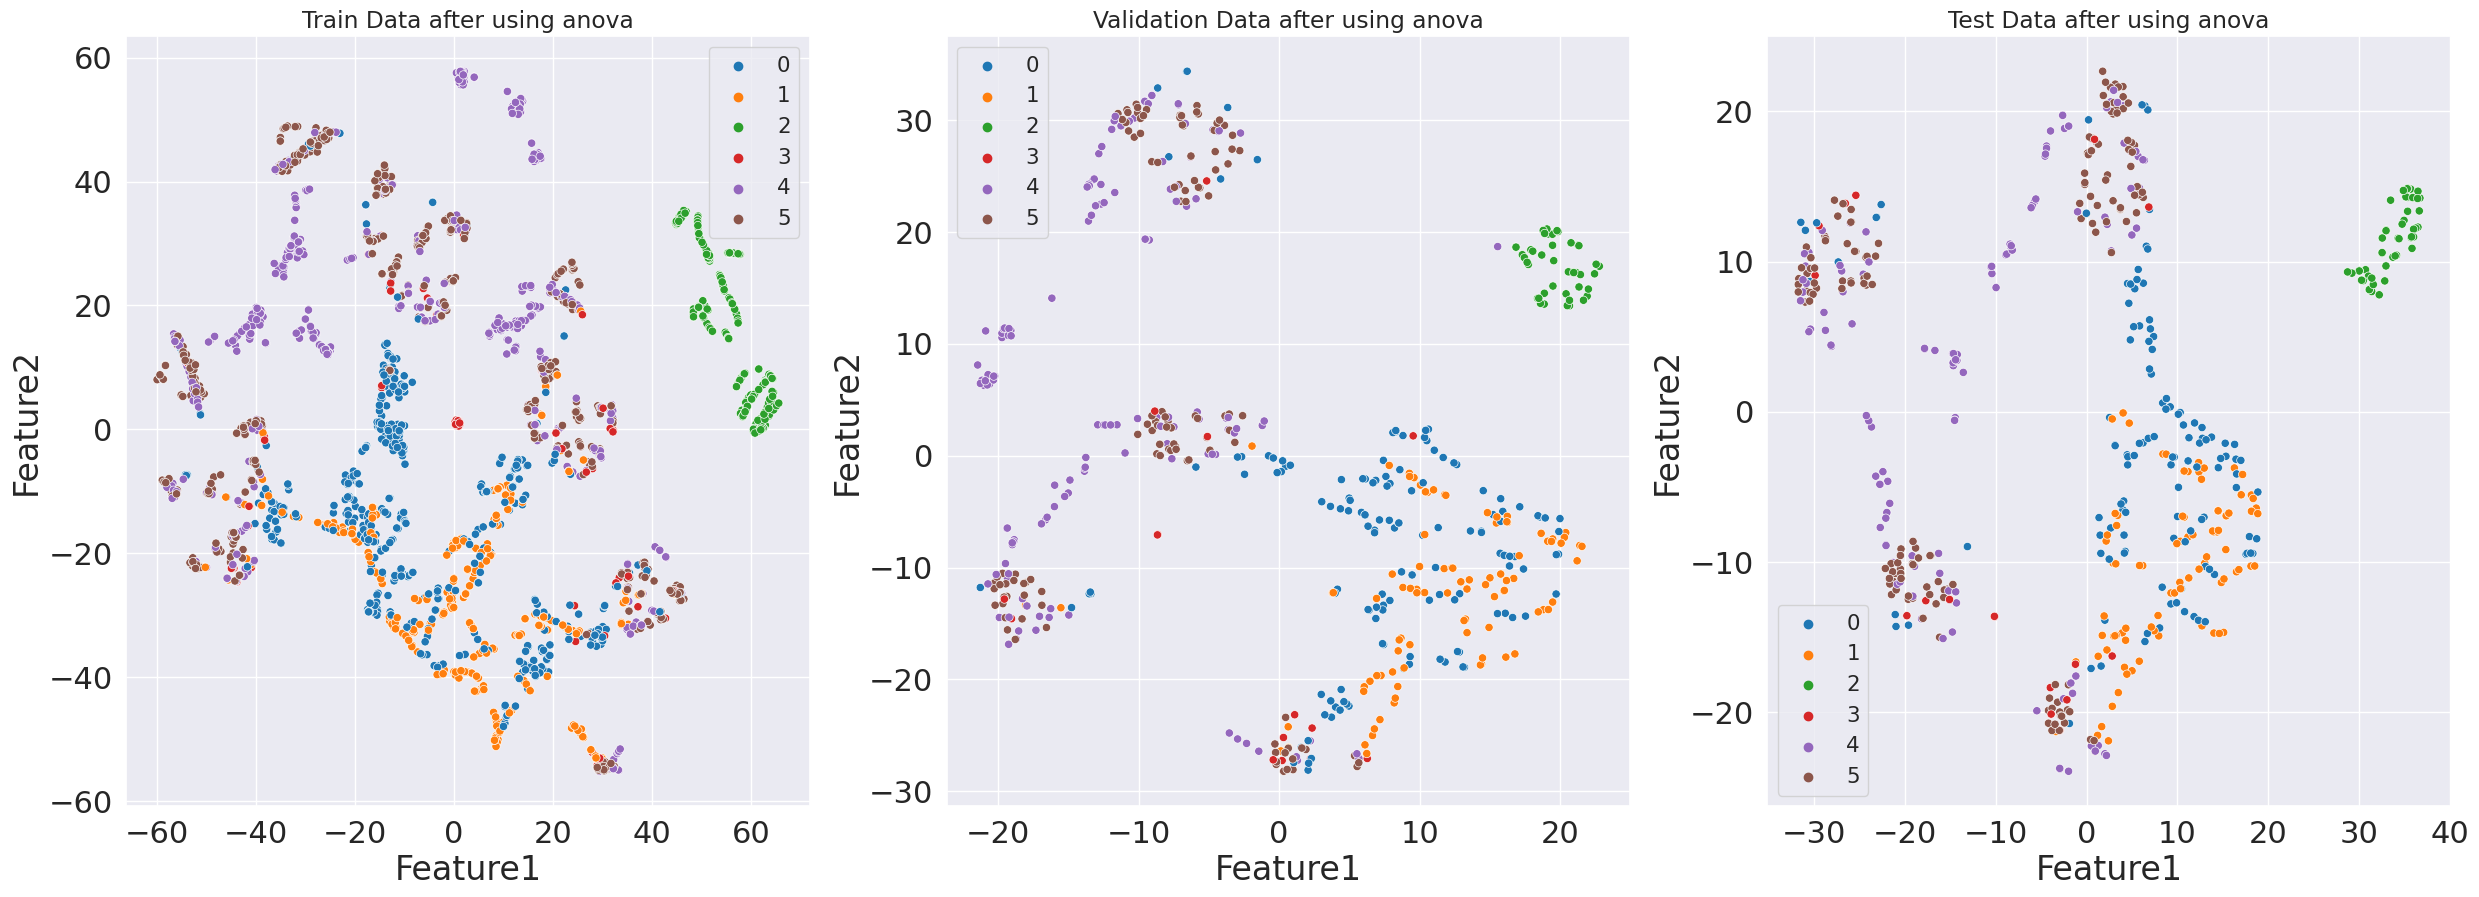

In [ ]:
figs,axis=plt.subplots(1,3,figsize=(30,10))
# sns.set(rc = {'figure.figsize':(15,10)})
sns.set(font_scale = 1.4)
sns.scatterplot(x=X_train_best_anova_tsne[:,0], y=X_train_best_anova_tsne[:,1], hue=y_train_encoded, ax=axis[0], palette="tab10").set(title='Train Data after using anova', xlabel='Feature1', ylabel='Feature2')
sns.scatterplot(x=X_val_best_anova_tsne[:,0],y=X_val_best_anova_tsne[:,1],hue=y_val_encoded,ax=axis[1],palette="tab10").set(title='Validation Data after using anova',xlabel='Feature1',ylabel='Feature2')
sns.scatterplot(x=X_test_best_anova_tsne[:,0],y=X_test_best_anova_tsne[:,1],hue=y_test_encoded,ax=axis[2],palette="tab10").set(title='Test Data after using anova',xlabel='Feature1',ylabel='Feature2')

Then we updated the dataset, to be used in the next steps, based on the technique that provides us with highest validation accuracy

In [ ]:
max(anova_val_accuracies), max(PCA_val_accuracies)

(0.749376118183136, 0.7294117569923401)

Text(0, 0.5, 'Validation Accuracies')

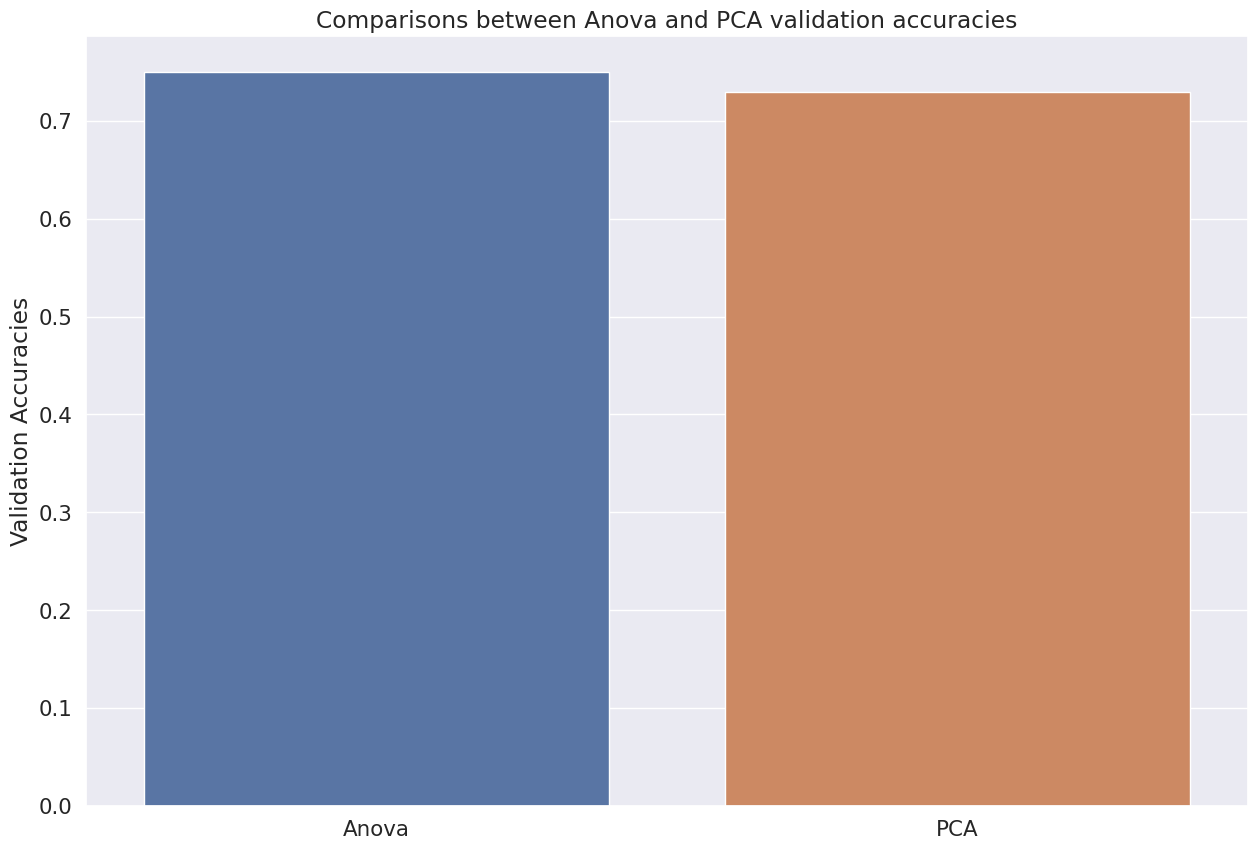

In [ ]:
sns.barplot(x=["Anova", "PCA"], y=[max(anova_val_accuracies), max(PCA_val_accuracies)])
plt.title('Comparisons between Anova and PCA validation accuracies')
plt.ylabel('Validation Accuracies')

In [ ]:
k_best = SelectKBest(f_classif, k=best_n_feature_anova)
X_train_best_anova_val=k_best.fit_transform(X_train_scaled, y_train_encoded)
X_val_best_anova_val=k_best.transform(X_val_scaled)
X_test_best_anova_val=k_best.transform(X_test_scaled)

The average confusion matrix for the highest validation accuracy

18/18 [==============================] - 0s 1ms/step


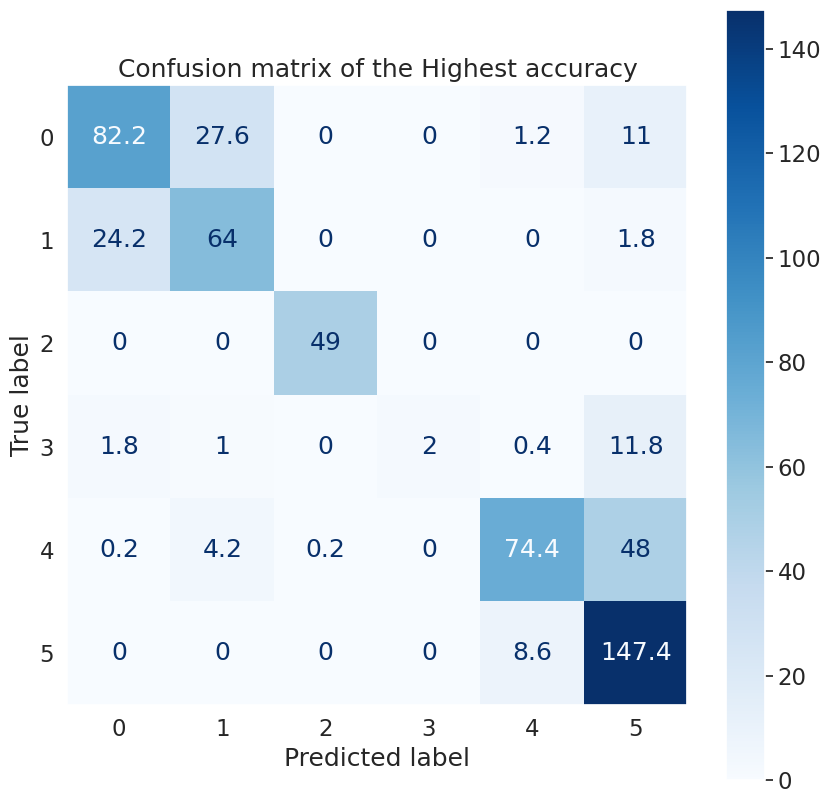

In [ ]:
idx_anova=np.array(anova_test_accuracies).argmax()
highest_val_anova_models=anova_models[idx_anova]
# Calculate the Average confusion test matrix
cm1 = np.zeros(shape=(6, 6))
for model in highest_val_anova_models['models']:
    pred = model.predict(X_test_best_anova_val).argmax(axis=1)
    cm1 += confusion_matrix(y_test_encoded, pred)
cm_avg_1 = cm1 / len(base_line_models_dict['models'])
# Set your custom color palette
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
sns.set(font_scale=1.5)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_avg_1, )
disp = disp.plot(cmap=plt.cm.Blues, values_format='g', )

fig = disp.ax_.get_figure()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.title('Confusion matrix of the Highest accuracy')
plt.grid(False)
plt.show()

18/18 [==============================] - 0s 4ms/step


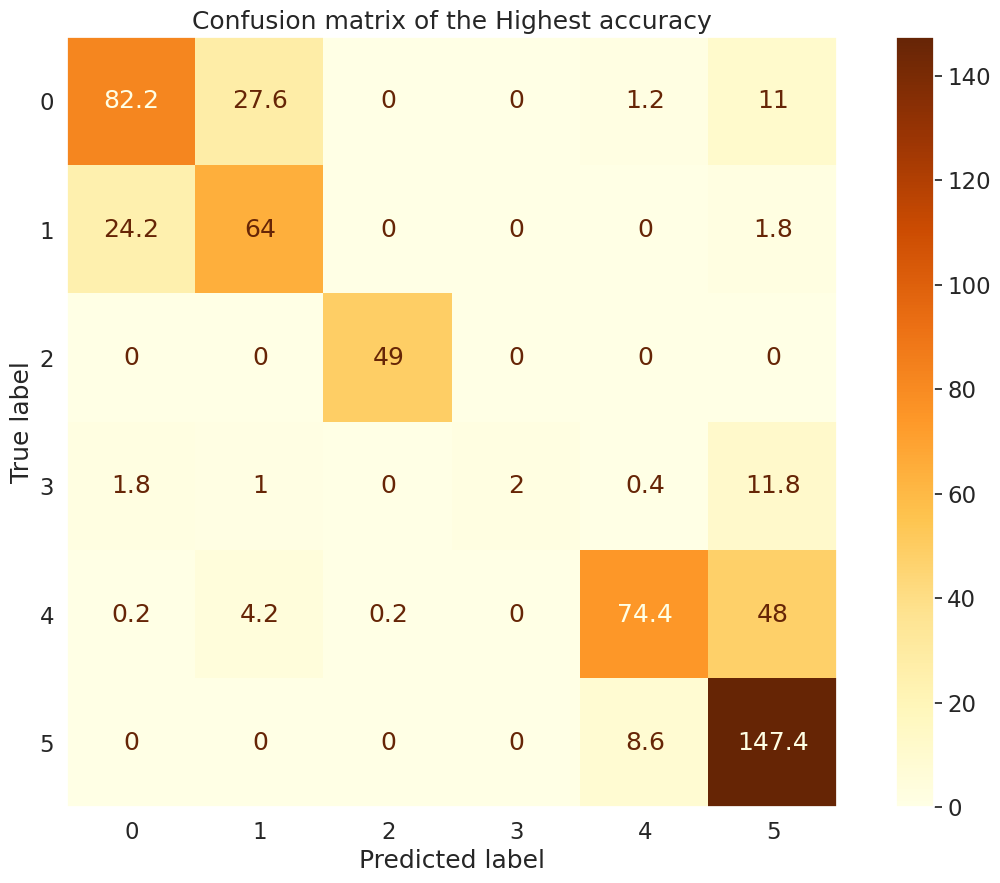

In [ ]:
idx_anova=np.array(anova_test_accuracies).argmax()
highest_val_anova_models=anova_models[idx_anova]
# Calculate the Average confusion test matrix
cm1 = np.zeros(shape=(6, 6))
for model in highest_val_anova_models['models']:
    pred = model.predict(X_test_best_anova_val).argmax(axis=1)
    cm1 += confusion_matrix(y_test_encoded, pred)
cm_avg_1 = cm1 / len(base_line_models_dict['models'])
# Set your custom color palette
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
sns.set(font_scale=1.5)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_avg_1)
disp.plot(cmap='YlOrBr', values_format='g')
plt.title('Confusion matrix of the Highest accuracy')
plt.grid(False)
plt.show()


In [ ]:
batches = [32,64,128]
batch_accuracies_dict_list = []
for batch_size in batches:
    batch_accuracies_dict, batch_models_dict,batch_models_train_acc,batch_models_test_acc,batch_models_valid_acc = Build_experment(X_train_best_anova_val, y_train_encoded, X_val_best_anova_val, y_val_encoded, X_test_best_anova_val, y_test_encoded, optimizer, n_of_hidden_layers=1, n_neurons=10, activation='relu', epochs=100, batch_size=batch_size, n_of_models=5)
    batch_accuracies_dict_list.append(batch_accuracies_dict)

18/18 [==============================] - 0s 2ms/step - loss: 0.6083 - accuracy: 0.7201


In [ ]:
pd.DataFrame(pd.Series(batch_accuracies_dict_list[0])).transpose()

Min_train_acc  Max_train_acc  AVG_train_acc  Min_test_acc  Max_test_acc  \
0        0.75945        0.76785       0.764032      0.750446      0.771836   

   AVG_test_acc  Min_valid_acc  Max_valid_acc  AVG_valid_acc  
0      0.758645        0.73262       0.789661       0.762923

In [ ]:
pd.DataFrame(pd.Series(batch_accuracies_dict_list[1])).transpose()

Min_train_acc  Max_train_acc  AVG_train_acc  Min_test_acc  Max_test_acc  \
0        0.75525       0.769759       0.763116      0.743316      0.780749   

   AVG_test_acc  Min_valid_acc  Max_valid_acc  AVG_valid_acc  
0      0.764349       0.757576       0.775401       0.764349

In [ ]:
pd.DataFrame(pd.Series(batch_accuracies_dict_list[2])).transpose()

Min_train_acc  Max_train_acc  AVG_train_acc  Min_test_acc  Max_test_acc  \
0       0.735777       0.770523       0.753112      0.750446      0.771836   

   AVG_test_acc  Min_valid_acc  Max_valid_acc  AVG_valid_acc  
0      0.759002       0.720143       0.757576       0.747594

In [ ]:
idx=np.array([batch_accuracies_dict_list[0]['AVG_valid_acc'],batch_accuracies_dict_list[1]['AVG_valid_acc'],batch_accuracies_dict_list[2]['AVG_valid_acc']]).argmax()
best_batch_size=batches[idx]
best_batch_size

64

In [ ]:
n_hidden_layers = [1,2,4,8]
n_neurons = [10,20,30,40]
hidden_accuracies_dict_list = {1:[],2:[],4:[],8:[]}

for n_hidden in n_hidden_layers:
    for n_neuron in n_neurons:
        hidden_accuracies_dict, hidden_models_dict,hidden_models_train_acc,hidden_models_test_acc,hidden_models_valid_acc = Build_experment(X_train_best_anova_val, y_train_encoded, X_val_best_anova_val, y_val_encoded, X_test_best_anova_val, y_test_encoded, optimizer, n_of_hidden_layers=n_hidden, n_neurons=n_neuron, activation='relu', epochs=100, batch_size=best_batch_size, n_of_models=5)
        hidden_accuracies_dict_list[n_hidden].append(hidden_accuracies_dict)

18/18 [==============================] - 0s 2ms/step - loss: 0.4931 - accuracy: 0.7932


In [ ]:
hidden_layers_1=pd.DataFrame(hidden_accuracies_dict_list[1])
hidden_layers_1

Min_train_acc  Max_train_acc  AVG_train_acc  Min_test_acc  Max_test_acc  \
0       0.747232       0.767087       0.757999      0.748663      0.764706   
1       0.765178       0.780832       0.770676      0.752228      0.789661   
2       0.765941       0.779305       0.772967      0.757576      0.780749   
3       0.775487       0.789996       0.783811      0.759358      0.793226   

   AVG_test_acc  Min_valid_acc  Max_valid_acc  AVG_valid_acc  
0      0.757219       0.736185       0.782531       0.760428  
1      0.764706       0.766488       0.789661       0.777540  
2      0.768627       0.761141       0.780749       0.770053  
3      0.775045       0.775401       0.798574       0.785383

In [ ]:
hidden_layers_2=pd.DataFrame(hidden_accuracies_dict_list[2])
hidden_layers_2

Min_train_acc  Max_train_acc  AVG_train_acc  Min_test_acc  Max_test_acc  \
0       0.763268       0.783123       0.775105      0.768271      0.780749   
1       0.774341       0.788469       0.783505      0.764706      0.791444   
2       0.788469       0.801833       0.794273      0.786096      0.809269   
3       0.791905       0.811378       0.799771      0.789661      0.823529   

   AVG_test_acc  Min_valid_acc  Max_valid_acc  AVG_valid_acc  
0      0.775401       0.754011       0.787879       0.776827  
1      0.778966       0.775401       0.789661       0.785383  
2      0.796791       0.784314       0.800357       0.792157  
3      0.801783       0.795009       0.821747       0.802852

In [ ]:
hidden_layers_4=pd.DataFrame(hidden_accuracies_dict_list[4])
hidden_layers_4

Min_train_acc  Max_train_acc  AVG_train_acc  Min_test_acc  Max_test_acc  \
0       0.760596       0.798778       0.778541      0.748663      0.782531   
1       0.790378       0.801451       0.797251      0.778966      0.811052   
2       0.808706       0.835815       0.815578      0.795009      0.811052   
3       0.814815       0.841924       0.825200      0.812834      0.837790   

   AVG_test_acc  Min_valid_acc  Max_valid_acc  AVG_valid_acc  
0      0.766845       0.750446       0.787879       0.771123  
1      0.794652       0.766488       0.791444       0.781105  
2      0.806061       0.796791       0.834225       0.806417  
3      0.821390       0.809269       0.825312       0.817469

In [ ]:
hidden_layers_8=pd.DataFrame(hidden_accuracies_dict_list[8])
hidden_layers_8

Min_train_acc  Max_train_acc  AVG_train_acc  Min_test_acc  Max_test_acc  \
0       0.712867       0.786178       0.752959      0.723708      0.775401   
1       0.801451       0.820924       0.812448      0.771836      0.811052   
2       0.791142       0.808324       0.799007      0.787879      0.814617   
3       0.799542       0.842688       0.824208      0.795009      0.825312   

   AVG_test_acc  Min_valid_acc  Max_valid_acc  AVG_valid_acc  
0      0.761854       0.704100       0.780749       0.752941  
1      0.796791       0.791444       0.819964       0.806061  
2      0.798574       0.789661       0.827094       0.805348  
3      0.805348       0.793226       0.827094       0.809982

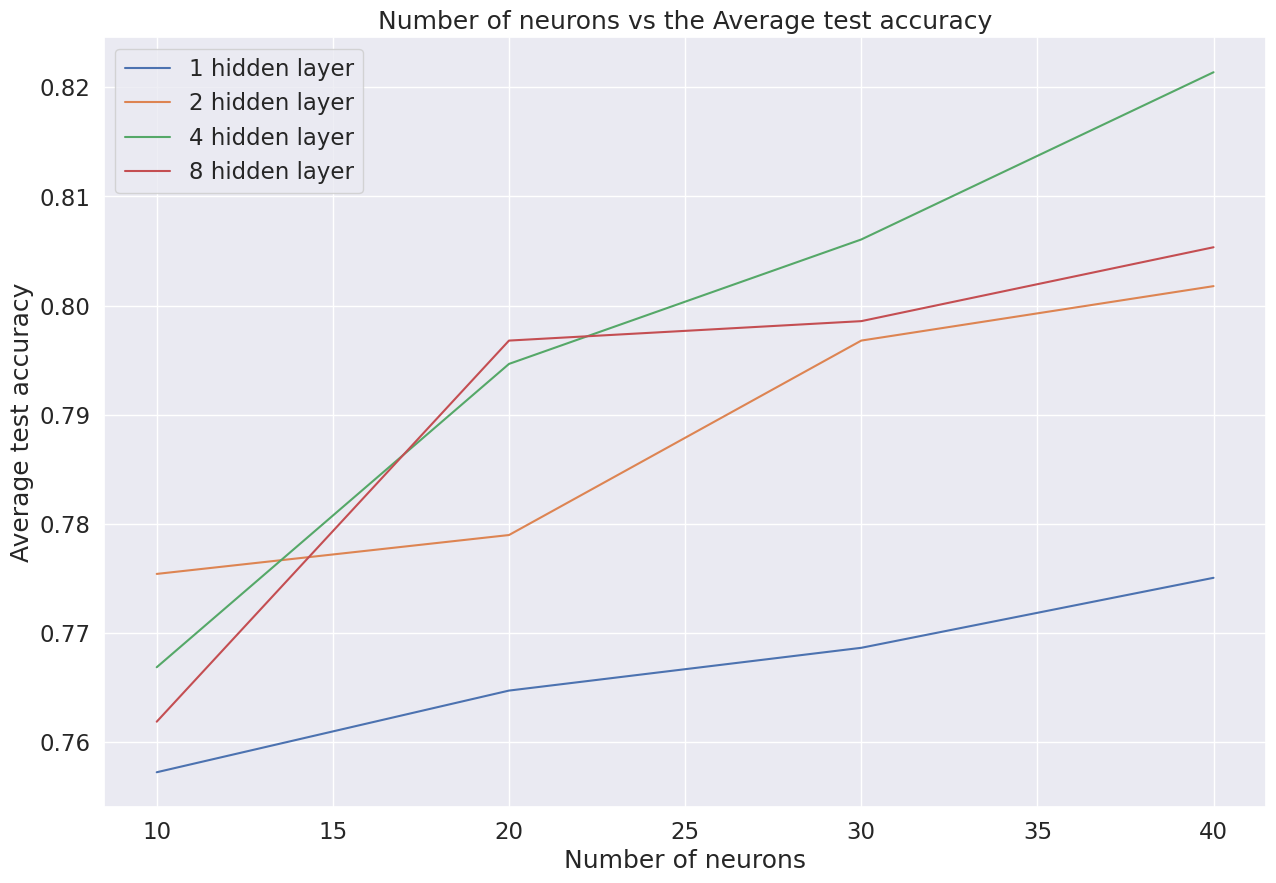

In [ ]:
sns.lineplot(x=n_neurons,y=hidden_layers_1['AVG_test_acc'],label='1 hidden layer')
sns.lineplot(x=n_neurons,y=hidden_layers_2['AVG_test_acc'],label='2 hidden layer')
sns.lineplot(x=n_neurons,y=hidden_layers_4['AVG_test_acc'],label='4 hidden layer')
sns.lineplot(x=n_neurons,y=hidden_layers_8['AVG_test_acc'],label='8 hidden layer')
plt.title('Number of neurons vs the Average test accuracy')
plt.xlabel('Number of neurons')
plt.ylabel('Average test accuracy')
plt.show()

In [ ]:
maxi=-99999
best_neurons=-9999
best_hidden=-9999
hidden_layers_list=[hidden_layers_1,hidden_layers_2,hidden_layers_4,hidden_layers_8]
for i,hidden_layer in enumerate(hidden_layers_list) :
    if max(hidden_layer['AVG_valid_acc']) >maxi :
        maxi=max(hidden_layer['AVG_valid_acc'])
        idx=np.array(hidden_layer['AVG_valid_acc']).argmax()
        best_neurons=n_neurons[idx]
        best_hidden=n_hidden_layers[i]
best_neurons,best_hidden

(40, 4)

In [ ]:
optim_accuracies_dict = {
                    'AdamW_lr_0.1':[],'AdamW_lr_0.01':[],'AdamW_lr_0.001':[],
                   'SGD_m_0.1_lr_0.1':[],'SGD_m_0.1_lr_0.01':[],'SGD_m_0.1_lr_0.001':[],
                   'SGD_m_0.5_lr_0.1':[],'SGD_m_0.5_lr_0.01':[],'SGD_m_0.5_lr_0.001':[],
                   'SGD_m_0.9_lr_0.1':[],'SGD_m_0.9_lr_0.01':[],'SGD_m_0.9_lr_0.001':[],
                   'RMSprop_lr_0.1':[],'RMSprop_lr_0.01':[],'RMSprop_lr_0.001':[],
}
optim_accuracies_dict['AdamW_lr_0.1'].append('sss')
optim_accuracies_dict

{'AdamW_lr_0.1': ['sss'],
 'AdamW_lr_0.01': [],
 'AdamW_lr_0.001': [],
 'SGD_m_0.1_lr_0.1': [],
 'SGD_m_0.1_lr_0.01': [],
 'SGD_m_0.1_lr_0.001': [],
 'SGD_m_0.5_lr_0.1': [],
 'SGD_m_0.5_lr_0.01': [],
 'SGD_m_0.5_lr_0.001': [],
 'SGD_m_0.9_lr_0.1': [],
 'SGD_m_0.9_lr_0.01': [],
 'SGD_m_0.9_lr_0.001': [],
 'RMSprop_lr_0.1': [],
 'RMSprop_lr_0.01': [],
 'RMSprop_lr_0.001': []}

In [ ]:
from tensorflow.keras.optimizers import SGD,RMSprop

optimizers=[AdamW(learning_rate=0.1,weight_decay=0.0001),AdamW(learning_rate=0.01,weight_decay=0.0001),AdamW(learning_rate=0.001,weight_decay=0.0001),
            SGD(learning_rate=0.1,momentum=0.1),SGD(learning_rate=0.01,momentum=0.1),SGD(learning_rate=0.001,momentum=0.1),
            SGD(learning_rate=0.1,momentum=0.5),SGD(learning_rate=0.01,momentum=0.5),SGD(learning_rate=0.001,momentum=0.5),
            SGD(learning_rate=0.1,momentum=0.9),SGD(learning_rate=0.01,momentum=0.9),SGD(learning_rate=0.001,momentum=0.9),
            RMSprop(learning_rate=0.1),RMSprop(learning_rate=0.01),RMSprop(learning_rate=0.001)
            ]
optim_accuracies = {
                    'AdamW_lr_0.1':[],'AdamW_lr_0.01':[],'AdamW_lr_0.001':[],
                   'SGD_m_0.1_lr_0.1':[],'SGD_m_0.1_lr_0.01':[],'SGD_m_0.1_lr_0.001':[],
                   'SGD_m_0.5_lr_0.1':[],'SGD_m_0.5_lr_0.01':[],'SGD_m_0.5_lr_0.001':[],
                   'SGD_m_0.9_lr_0.1':[],'SGD_m_0.9_lr_0.01':[],'SGD_m_0.9_lr_0.001':[],
                   'RMSprop_lr_0.1':[],'RMSprop_lr_0.01':[],'RMSprop_lr_0.001':[],
}

experiments_names=['AdamW_lr_0.1','AdamW_lr_0.01','AdamW_lr_0.001',
                   'SGD_m_0.1_lr_0.1','SGD_m_0.1_lr_0.01','SGD_m_0.1_lr_0.001',
                   'SGD_m_0.5_lr_0.1','SGD_m_0.5_lr_0.01','SGD_m_0.5_lr_0.001',
                   'SGD_m_0.9_lr_0.1','SGD_m_0.9_lr_0.01','SGD_m_0.9_lr_0.001',
                   'RMSprop_lr_0.1','RMSprop_lr_0.01','RMSprop_lr_0.001',
                   ]
best_optim=0
best_optim_name=''
maxi_optim=-9999
for i,optim in enumerate(optimizers):
    optim_accuracies_dict, optim_models_dict,optim_models_train_acc,optim_models_test_acc,optim_models_valid_acc = Build_experment(X_train_best_anova_val, y_train_encoded, X_val_best_anova_val, y_val_encoded, X_test_best_anova_val, y_test_encoded, optim, n_of_hidden_layers=best_hidden, n_neurons=best_neurons, activation='relu', epochs=500, batch_size=best_batch_size, n_of_models=5)
    if optim_accuracies_dict['AVG_valid_acc']>maxi_optim:
        maxi_optim=optim_accuracies_dict['AVG_valid_acc']
        best_optim_name=experiments_names[i]
        best_optim=optimizers[i]
    optim_accuracies[experiments_names[i]].append(optim_accuracies_dict)

18/18 [==============================] - 0s 3ms/step - loss: 0.5278 - accuracy: 0.7790


KeyError: ignored

In [ ]:
optim_accuracies

In [ ]:
optim_accuracies[best_optim_name]

In [ ]:
best_optim_name

In [ ]:
activations=['relu','leaky_relu','sigmoid','tanh']
activation_accuracies_dict_list = {}

maxi_activation=-9999
best_activation=''
best_model=0
for activation in activations :
    activation_accuracies_dict, activation_models_dict,activation_models_train_acc,activation_models_test_acc,activation_models_valid_acc = Build_experment(X_train_best_anova_val, y_train_encoded, X_val_best_anova_val, y_val_encoded, X_test_best_anova_val, y_test_encoded, best_optim, n_of_hidden_layers=best_hidden, n_neurons=best_neurons, activation=activation, epochs=100, batch_size=best_batch_size, n_of_models=5)
    if activation_accuracies_dict['AVG_test_acc'] >maxi_activation :
        maxi_activation=activation_accuracies_dict['AVG_test_acc']
        best_activation=activation
        best_model=activation_models_dict['models'][np.array(activation_models_test_acc).argmax()]
    activation_accuracies_dict_list[activation]=activation_accuracies_dict

18/18 [==============================] - 0s 2ms/step - loss: 0.4852 - accuracy: 0.8057


In [ ]:
dfs=[]
for i in activation_accuracies_dict_list.keys():
    dfs.append(pd.DataFrame(pd.Series(activation_accuracies_dict_list[i])).transpose())
activation_results=pd.concat(dfs)
activation_results.index=activations
activation_results

Min_train_acc  Max_train_acc  AVG_train_acc  Min_test_acc  \
relu             0.802596       0.827415       0.811226      0.777184   
leaky_relu       0.803360       0.825888       0.815731      0.791444   
sigmoid          0.738068       0.759450       0.746392      0.750446   
tanh             0.793814       0.800687       0.798702      0.789661   

            Max_test_acc  AVG_test_acc  Min_valid_acc  Max_valid_acc  \
relu            0.818182      0.799287       0.782531       0.814617   
leaky_relu      0.837790      0.815330       0.789661       0.816399   
sigmoid         0.773619      0.761497       0.739750       0.755793   
tanh            0.803922      0.794652       0.791444       0.805704   

            AVG_valid_acc  
relu             0.801070  
leaky_relu       0.803565  
sigmoid          0.745455  
tanh             0.802496

In [ ]:
activation_accuracies_dict_list

{'relu': {'Min_train_acc': 0.802596390247345,
  'Max_train_acc': 0.8274150490760803,
  'AVG_train_acc': 0.8112256526947021,
  'Min_test_acc': 0.7771835923194885,
  'Max_test_acc': 0.8181818127632141,
  'AVG_test_acc': 0.7992869853973389,
  'Min_valid_acc': 0.782531201839447,
  'Max_valid_acc': 0.8146167397499084,
  'AVG_valid_acc': 0.8010695099830627},
 'leaky_relu': {'Min_train_acc': 0.8033600449562073,
  'Max_train_acc': 0.8258877396583557,
  'AVG_train_acc': 0.8157312035560608,
  'Min_test_acc': 0.7914438247680664,
  'Max_test_acc': 0.8377896547317505,
  'AVG_test_acc': 0.8153297662734985,
  'Min_valid_acc': 0.7896613478660583,
  'Max_valid_acc': 0.8163992762565613,
  'AVG_valid_acc': 0.8035650730133057},
 'sigmoid': {'Min_train_acc': 0.7380679845809937,
  'Max_train_acc': 0.7594501972198486,
  'AVG_train_acc': 0.746391761302948,
  'Min_test_acc': 0.7504456043243408,
  'Max_test_acc': 0.7736185193061829,
  'AVG_test_acc': 0.7614973068237305,
  'Min_valid_acc': 0.7397504448890686,
  

18/18 [==============================] - 0s 2ms/step


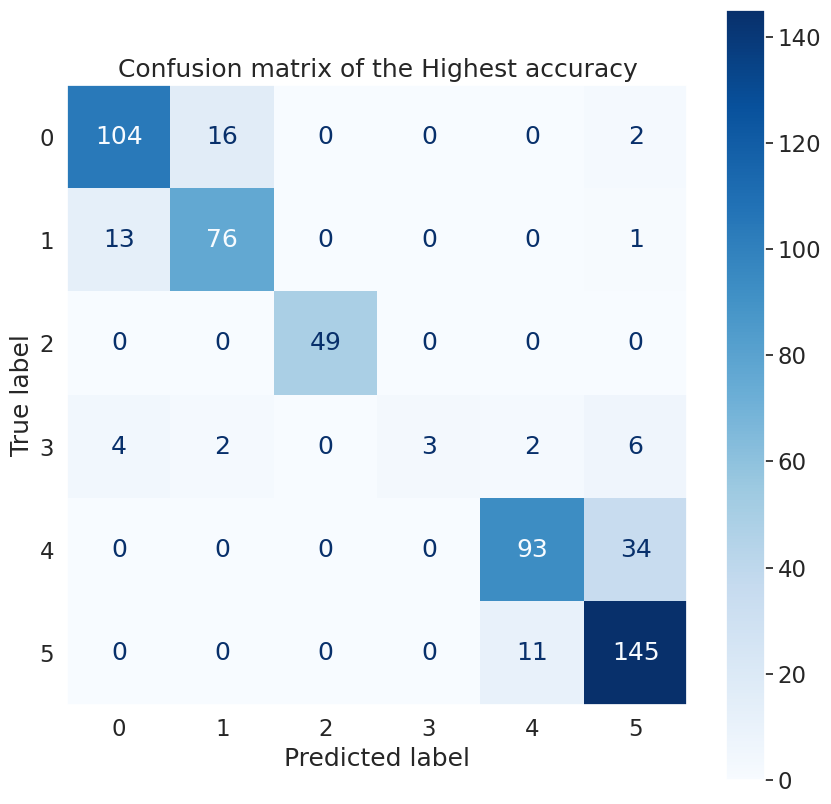

In [ ]:
# Set your custom color palette
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
sns.set(font_scale = 1.5)

pred = best_model.predict(X_test_best_anova_val).argmax(axis=1)
cm = confusion_matrix(y_test_encoded, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g',)

fig = disp.ax_.get_figure()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.title('Confusion matrix of the Highest accuracy')
plt.grid(False)
plt.show()

In [ ]:
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense
from tensorflow_addons.optimizers import AdamW
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
def plot_history(dict_of_lists,type='loss'):
  axis_idx=[(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]
  fig, axes = plt.subplots(2, 3,figsize=(20,10))

  for i in range(len(dict_of_lists)):
    ax=axes[axis_idx[i][0]][axis_idx[i][1]]
    # summarize history for accuracy
    ax.plot(dict_of_lists[i].history[type])
    ax.plot(dict_of_lists[i].history[f'val_{type}'])
    ax.set_title(f'Model {i+1} {type.title()}',size=15)
    ax.set_ylabel(f'{type.title()}',size=10)
    ax.set_xlabel('Epoch',size=10)
    ax.legend(['train', 'test'], loc='upper left')
  plt.suptitle(f'Models {type.title()} per Epoc',size=15,y=.93)
  plt.show()

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/archive (1)/UNR-IDD.csv')


In [ ]:
print('Data Shape',data.shape)
print(data.info())

Data Shape (37411, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37411 entries, 0 to 37410
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      37411 non-null  object
 1   Port Number                    37411 non-null  object
 2   Received Packets               37411 non-null  int64 
 3   Received Bytes                 37411 non-null  int64 
 4   Sent Bytes                     37411 non-null  int64 
 5   Sent Packets                   37411 non-null  int64 
 6   Port alive Duration (S)        37411 non-null  int64 
 7   Packets Rx Dropped             37411 non-null  int64 
 8   Packets Tx Dropped             37411 non-null  int64 
 9   Packets Rx Errors              37411 non-null  int64 
 10  Packets Tx Errors              37411 non-null  int64 
 11  Delta Received Packets         37411 non-null  int64 
 12  Delta Received Bytes           37411 

In [ ]:
print(f"Number of Null values: {data.isnull().any().sum()}")
print(f"Dataset has {data.duplicated().sum()} duplicate rows")

Number of Null values: 0
Dataset has 1 duplicate rows


In [ ]:
# dropping duplicate rows
data.drop_duplicates(inplace=True)

<ipython-input-10-4b3bb10e343e>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


The dataset is strongly linearly correlated.


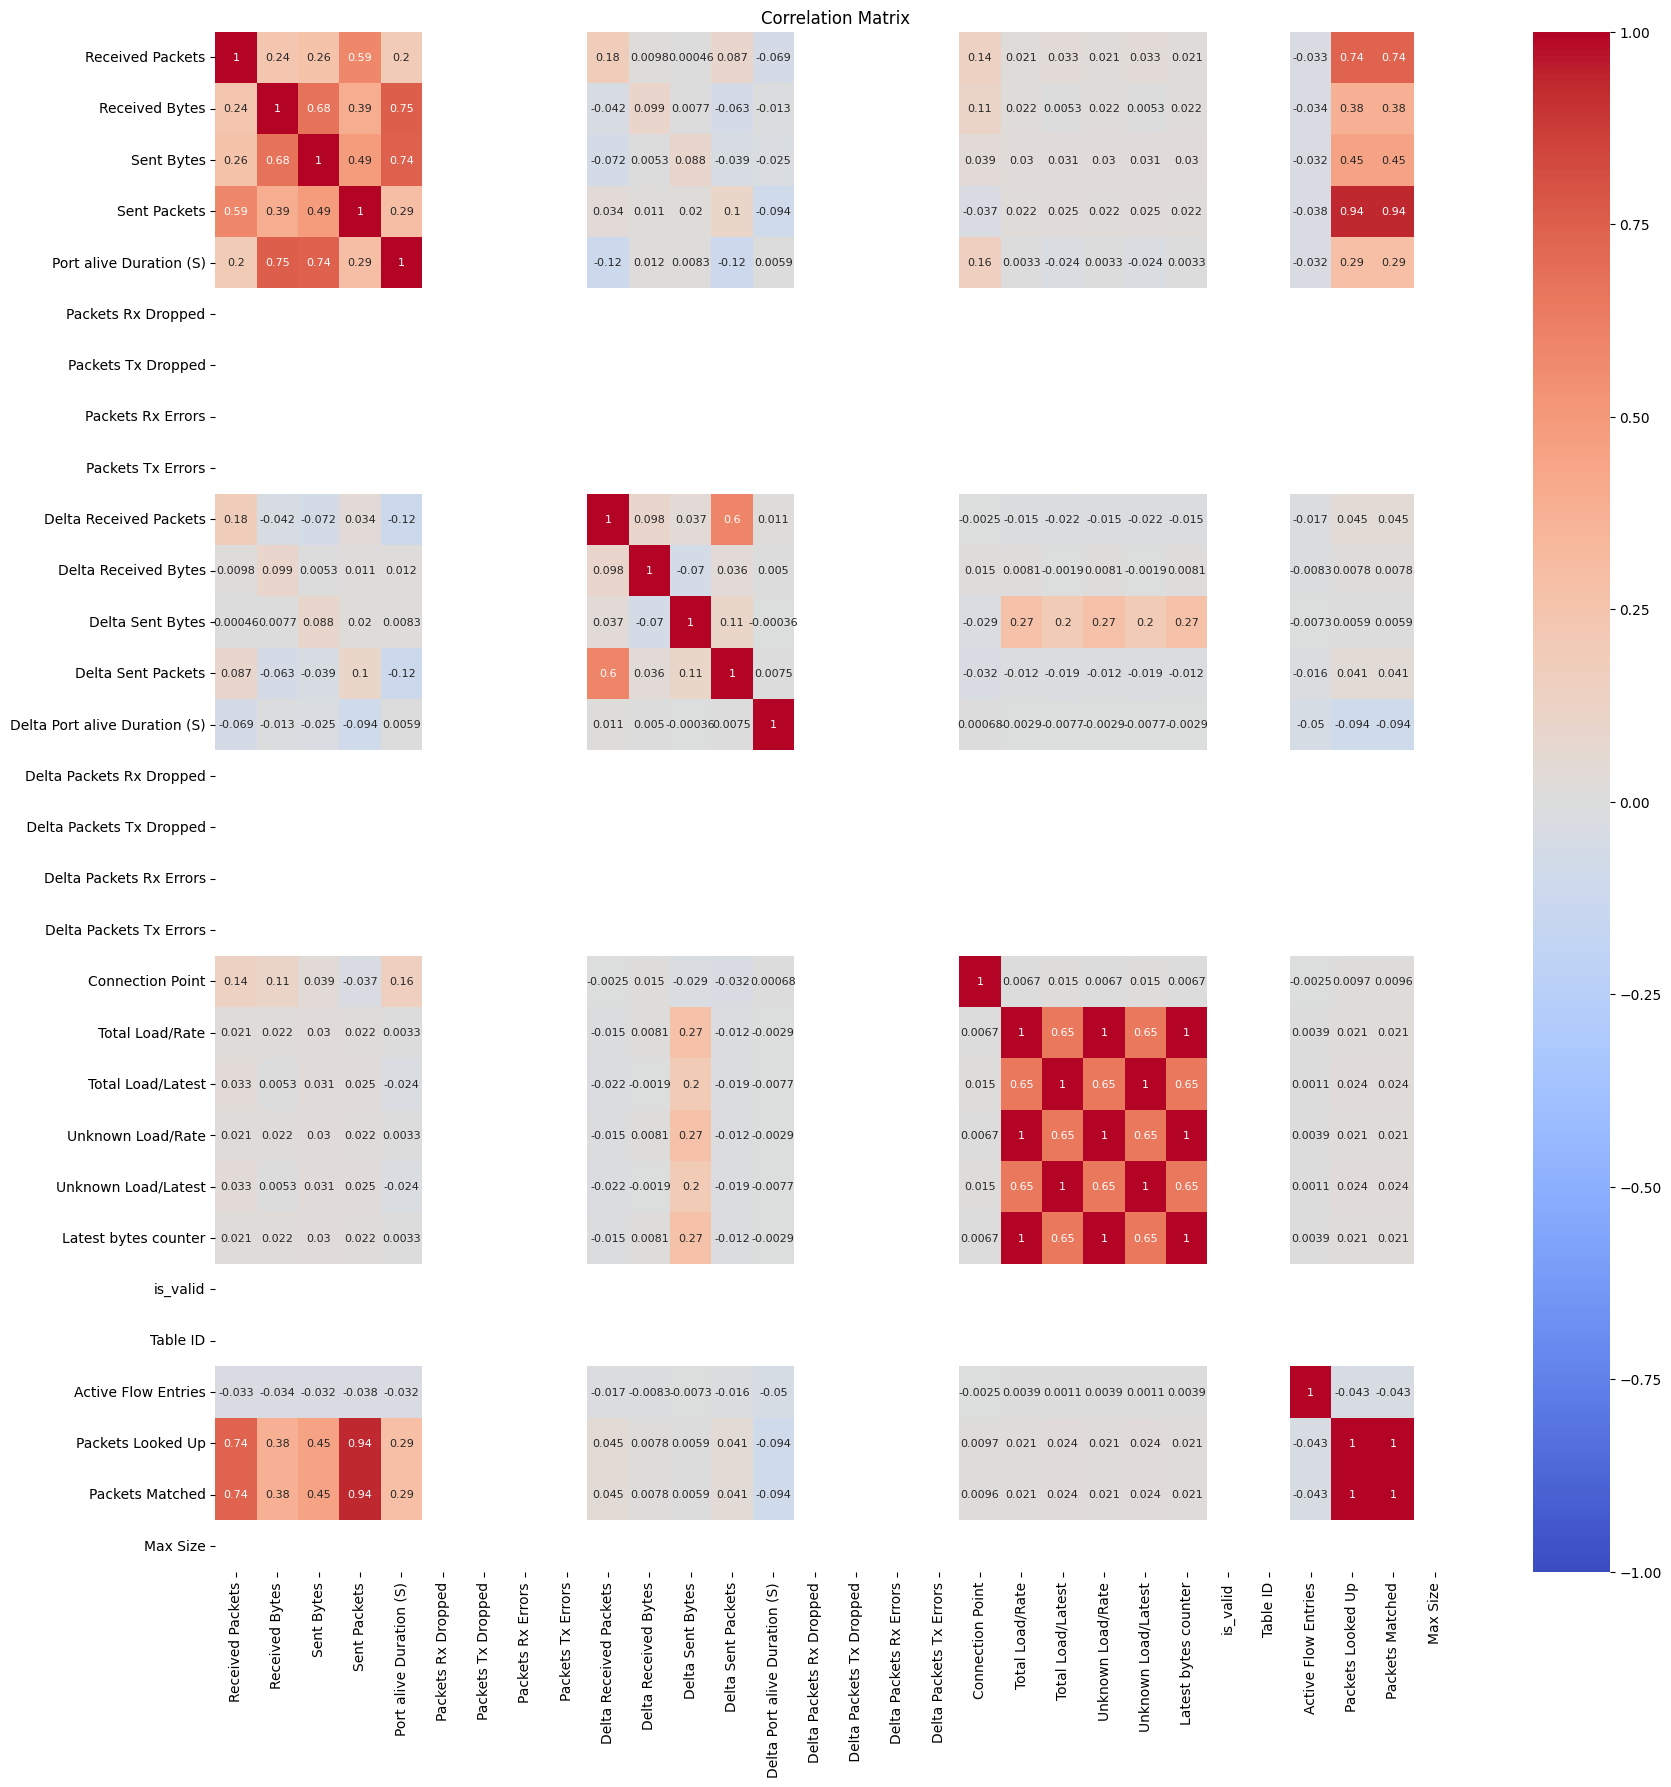

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})

# Check if the dataset is linear or not
max_corr = np.max(np.abs(corr_matrix.values - np.identity(corr_matrix.shape[0])))

if max_corr < 0.7:
    print('The dataset is not strongly linearly correlated.')
else:
    print('The dataset is strongly linearly correlated.')


In [ ]:
data.drop(['Switch ID', 'Port Number', 'Packets Rx Dropped', 'Packets Tx Dropped',
                  'Packets Rx Errors','Packets Tx Errors','Delta Packets Rx Dropped',
                  ' Delta Packets Tx Dropped', 'Delta Packets Rx Errors','Delta Packets Tx Errors',
                  'is_valid', 'Table ID','Max Size', 'Binary Label', 'Delta Received Packets',
                  'Delta Received Bytes', 'Delta Sent Bytes', 'Delta Sent Packets',
                  'Delta Port alive Duration (S)','Active Flow Entries'],
                 axis = 1, inplace = True)

<ipython-input-12-a1bc50f1253e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


The dataset is strongly linearly correlated.


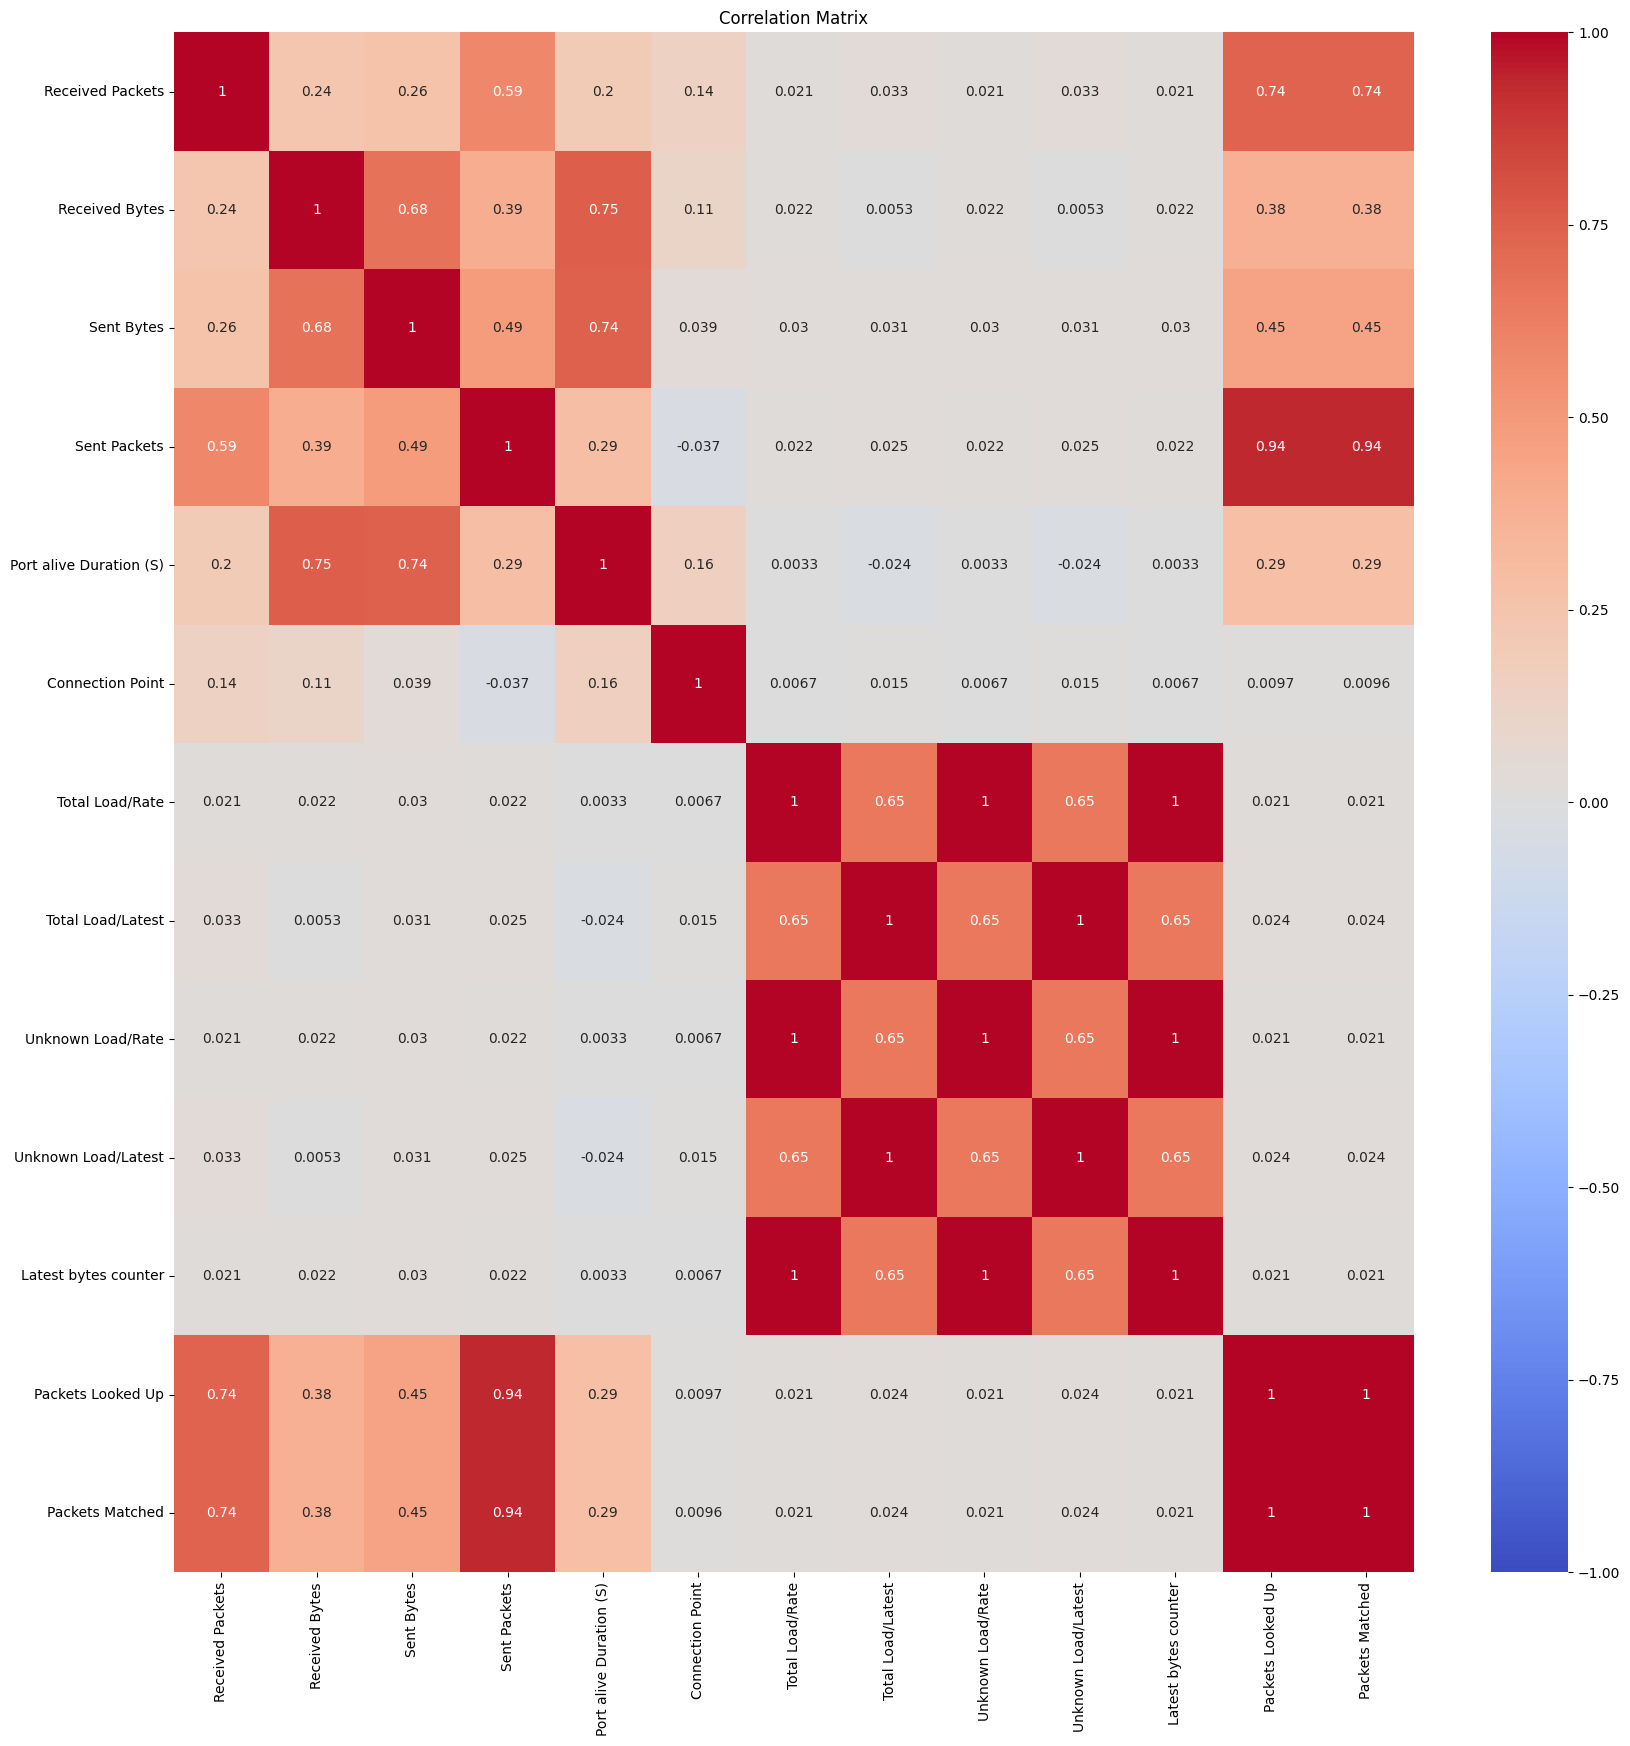

In [ ]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20,20))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Check if the dataset is linear or not
max_corr = np.max(np.abs(corr_matrix.values - np.identity(corr_matrix.shape[0])))
if max_corr < 0.7:
    print('The dataset is not strongly linearly correlated.')
else:
    print('The dataset is strongly linearly correlated.')

In [ ]:
col = data.columns # .columns gives columns names in data
print(col)

Index(['Received Packets', 'Received Bytes', 'Sent Bytes', 'Sent Packets',
       'Port alive Duration (S)', 'Connection Point', 'Total Load/Rate',
       'Total Load/Latest', 'Unknown Load/Rate', 'Unknown Load/Latest',
       'Latest bytes counter', 'Packets Looked Up', 'Packets Matched',
       'Label'],
      dtype='object')


In [ ]:
X = data.iloc[: , : -1]
y = data.iloc[: , -1]

In [ ]:
unique, counts = np.unique(y, return_counts=True)

In [ ]:
import plotly.express as px

In [ ]:
import plotly.express as px

# Define a custom color palette
custom_colors = ["#FF9999", "#66CCCC", "#FFCC99", "#6699FF", "#99FF99", "#FFCC66"]

# Create the pie chart
fig = px.pie(y, values=counts, names=unique, title='Labels', width=500, height=500, color_discrete_sequence=custom_colors)
fig.show()

BH, DI, N, OF, PS, TS = counts
print('Number of Normal: ', N)
print('Number of Port Scan : ', PS)
print('Number of Blackhole : ', BH)
print('Number of Diversion : ', DI)
print('Number of TCP-SYN : ', TS)
print('Number of Overflow : ', OF)


Number of Normal:  3773
Number of Port Scan :  9499
Number of Blackhole :  8420
Number of Diversion :  5615
Number of TCP-SYN :  9081
Number of Overflow :  1022


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = pd.DataFrame(y).columns
y = pd.DataFrame(le.fit_transform(y), columns = cols)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

cols = X.select_dtypes(include=['float64','int64']).columns

scaler = MinMaxScaler()
sc_Xtrain = scaler.fit_transform(X_train.select_dtypes(include=['float64','int64']))
X_train = pd.DataFrame(sc_Xtrain, columns = cols)

sc_Xtest = scaler.transform(X_test.select_dtypes(include=['float64','int64']))
X_test = pd.DataFrame(sc_Xtest, columns = cols)

In [ ]:
s = X_train.select_dtypes(np.number).lt(0).any()\
      .reindex(X_train.columns, fill_value=False)\
      .rename_axis("col").reset_index(name='isnegative')
print(s)

                        col  isnegative
0          Received Packets       False
1            Received Bytes       False
2                Sent Bytes       False
3              Sent Packets       False
4   Port alive Duration (S)       False
5          Connection Point       False
6           Total Load/Rate       False
7         Total Load/Latest       False
8         Unknown Load/Rate       False
9       Unknown Load/Latest       False
10     Latest bytes counter       False
11        Packets Looked Up       False
12          Packets Matched       False


In [ ]:
X_train

Received Packets  Received Bytes  Sent Bytes  Sent Packets  \
0              0.002140        0.046569    0.052846      0.001717   
1              0.002118        0.069684    0.052885      0.002021   
2              0.001565        0.046519    0.026565      0.001822   
3              0.072241        0.005095    0.006562      0.068850   
4              0.001491        0.069629    0.071828      0.967800   
...                 ...             ...         ...           ...   
26182          0.000113        0.000010    0.000143      0.000702   
26183          0.020790        0.396126    0.633928      0.018776   
26184          0.006027        0.162695    0.211834      0.008568   
26185          0.000386        0.000068    0.000057      0.000249   
26186          0.001312        0.023326    0.051572      0.264861   

       Port alive Duration (S)  Connection Point  Total Load/Rate  \
0                     0.065330              0.25         0.390516   
1                     0.069888              0.00         0.390516   
2                     0.069888              0.50         0.390516   
3                     0.012154              0.75         0.390516   
4                     0.261623              0.25         0.390516   
...                        ...               ...              ...   
26182                 0.109693              0.00         0.390516   
26183                 0.808265              0.50         0.390516   
26184                 0.664236              0.25         0.390516   
26185                 0.041021              0.25         0.390516   
26186                 0.060772              0.00         0.390516   

       Total Load/Latest  Unknown Load/Rate  Unknown Load/Latest  \
0               0.000000           0.390516             0.000000   
1               0.000000           0.390516             0.000000   
2               0.000000           0.390516             0.000000   
3               0.000000           0.390516             0.000000   
4               0.000000           0.390516             0.000000   
...                  ...                ...                  ...   
26182           0.000000           0.390516             0.000000   
26183           0.244346           0.390516             0.244346   
26184           0.000000           0.390516             0.000000   
26185           0.000000           0.390516             0.000000   
26186           0.000000           0.390516             0.000000   

       Latest bytes counter  Packets Looked Up  Packets Matched  
0                  0.390516           0.005095         0.005041  
1                  0.390516           0.002008         0.001991  
2                  0.390516           0.003330         0.003282  
3                  0.390516           0.054324         0.054289  
4                  0.390516           0.634092         0.634078  
...                     ...                ...              ...  
26182              0.390516           0.000878         0.000827  
26183              0.390516           0.021875         0.021789  
26184              0.390516           0.014896         0.014816  
26185              0.390516           0.006085         0.006023  
26186              0.390516           0.221303         0.221268  

[26187 rows x 13 columns]

In [ ]:
X_test

Received Packets  Received Bytes  Sent Bytes  Sent Packets  \
0              0.350031        0.390767    0.478180      0.760583   
1              0.008201        0.023793    0.053404      0.007743   
2              0.002599        0.000189    0.026551      0.002408   
3              0.002710        0.092897    0.053204      0.003577   
4              0.003030        0.000529    0.211655      0.008151   
...                 ...             ...         ...           ...   
11218          0.002645        0.000460    0.185197      0.007162   
11219          0.007540        0.070092    0.026454      0.001127   
11220          0.308981        0.114457    0.000079      0.000342   
11221          0.010052        0.302022    0.317377      0.011631   
11222          0.037790        0.025840    0.002168      0.022666   

       Port alive Duration (S)  Connection Point  Total Load/Rate  \
0                     0.787299              0.50         0.390516   
1                     0.044060              0.75         0.390656   
2                     0.015193              0.00         0.391813   
3                     0.302644              0.50         0.390516   
4                     0.461866              0.00         0.390516   
...                        ...               ...              ...   
11218                 0.398055              0.00         0.390516   
11219                 0.030386              0.50         0.390516   
11220                 0.057733              1.00         0.390516   
11221                 0.679429              0.25         0.390516   
11222                 0.003039              0.50         0.390516   

       Total Load/Latest  Unknown Load/Rate  Unknown Load/Latest  \
0               0.000000           0.390516             0.000000   
1               0.005355           0.390656             0.005355   
2               0.001654           0.391813             0.001654   
3               0.000000           0.390516             0.000000   
4               0.000000           0.390516             0.000000   
...                  ...                ...                  ...   
11218           0.000000           0.390516             0.000000   
11219           0.000000           0.390516             0.000000   
11220           0.000000           0.390516             0.000000   
11221           0.000000           0.390516             0.000000   
11222           0.000000           0.390516             0.000000   

       Latest bytes counter  Packets Looked Up  Packets Matched  
0                  0.390516           0.994057         0.994057  
1                  0.390656           0.007121         0.007073  
2                  0.391813           0.001921         0.001914  
3                  0.390516           0.007482         0.007371  
4                  0.390516           0.011859         0.011780  
...                     ...                ...              ...  
11218              0.390516           0.010661         0.010582  
11219              0.390516           0.005411         0.005369  
11220              0.390516           0.216158         0.216131  
11221              0.390516           0.009856         0.009746  
11222              0.390516           0.022621         0.022591  

[11223 rows x 13 columns]

In [ ]:
import keras
from keras.layers import Conv1D, MaxPooling1D, Flatten, BatchNormalization, Dense, Dropout
from keras.models import Sequential
import random
random.seed(10)

In [ ]:
def model():

# Create a sequential model
    model = Sequential()

# Add convolutional layers with ReLU activation function and padding = same
    model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(13,1)))
    model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2, strides=2))

    model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))

    model.add(MaxPooling1D(pool_size=2, strides=2))

    model.add(Conv1D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
    model.add(Conv1D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))

    model.add(MaxPooling1D(pool_size=2, strides=2))

    model.add(Conv1D(filters=512, kernel_size=3, strides=1, padding='same', activation='relu'))
    model.add(Conv1D(filters=512, kernel_size=3, strides=1, padding='same', activation='relu'))

    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=1, strides=1))

    # Flatten the output of the last convolutional layer to prepare for the fully connected layers
    model.add(Flatten())

    # Add fully connected layers with ReLU activation function and dropout regularization
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

    # Add output layer with softmax activation function for classification
    #model.add(Dense(1000, activation='softmax'))

    # Compile the model with categorical cross-entropy loss function and Adam optimizer
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Print the summary of the model architecture
    model.summary()

    return model

In [ ]:
model = model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 13, 64)            256       
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 64)            12352     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 64)            0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 128)            24704     
                                                                 
 conv1d_3 (Conv1D)           (None, 6, 128)            49280     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 128)           0         
 1D)                                                    

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/100
819/819 [==============================] - 33s 14ms/step - loss: 0.4333 - accuracy: 0.8212 - val_loss: 0.4522 - val_accuracy: 0.8168
Epoch 2/100
819/819 [==============================] - 13s 15ms/step - loss: 0.4223 - accuracy: 0.8259 - val_loss: 0.4050 - val_accuracy: 0.8254
Epoch 3/100
819/819 [==============================] - 11s 14ms/step - loss: 0.4799 - accuracy: 0.8149 - val_loss: 0.4027 - val_accuracy: 0.8277
Epoch 4/100
819/819 [==============================] - 11s 14ms/step - loss: 0.4219 - accuracy: 0.8263 - val_loss: 0.4008 - val_accuracy: 0.8327
Epoch 5/100
819/819 [==============================] - 12s 15ms/step - loss: 0.4040 - accuracy: 0.8322 - val_loss: 0.4072 - val_accuracy: 0.8361
Epoch 6/100
819/819 [==============================] - 12s 14ms/step - loss: 0.4324 - accuracy: 0.8196 - val_loss: 0.4575 - val_accuracy: 0.7813
Epoch 7/100
819/819 [==============================] - 12s 14ms/step - loss: 0.4065 - accuracy: 0.8328 - val_loss: 0.3853 - val_ac

In [ ]:
# Load the model with the highest validation accuracy
model = keras.models.load_model('best_model.h5')

In [ ]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

351/351 [==============================] - 4s 8ms/step - loss: 0.3549 - accuracy: 0.8537
accuracy: 85.37%


In [ ]:
# check history of model
history = history.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

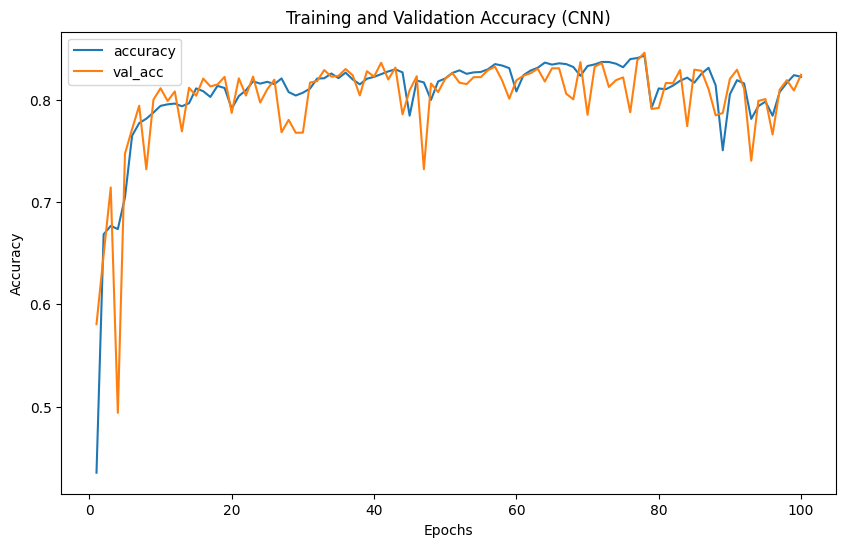

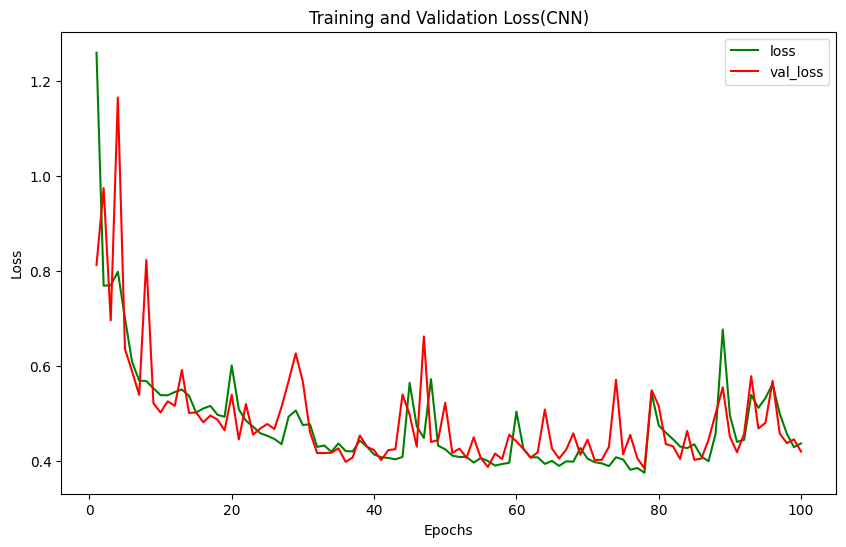

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

# visualize training and val accuracy
plt.figure(figsize=(10, 6))
plt.title('Training and Validation Accuracy (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

# visualize train and val loss
plt.figure(figsize=(10, 6))
plt.title('Training and Validation Loss(CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()